In [1]:
import vaex
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import poisson
from os.path import join, abspath
import sys
from os import pardir
from tqdm import tqdm

In [2]:
current = abspath('')
root_dir = abspath(join(current, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [6]:
name = "no"
spectral_dir = join(root_data_dir, "Color", name)
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Color/no'

In [7]:
vel_dir = join(root_data_dir, "Velocity-Distribution")
safe_mkdir(vel_dir)
vel_dir = join(root_data_dir, "Velocity-Distribution", name)
safe_mkdir(vel_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no already exist. Good to go!


In [10]:
files = glob(join(spectral_dir, "gaia*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.325)_(0.335).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.335)_(0.345).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.345)_(0.355).hdf5',
 '/home2/s2

In [11]:
index = 0
gaia = vaex.open(files[index])
gaia = gaia.filter("abs(z)<50").filter("rv>-999")
gaia = gaia.extract()
gaia

#      ra                    dec                 Jmag                Kmag                ph_qual    source_id            pm                  pmra                 e_pmra                pmdec                e_pmdec               parallax            e_parallax            gmag                bpmag              rpmag              fb_over_err         fr_over_err         ruwe                excess_factor       GLON                 GLAT                   distance_gspphot    distance_gspphot_lower    distance_gspphot_upper    ag_gspphot            ag_gspphot_lower        ag_gspphot_upper      fem_gspspec    fem_gspspec_lower    fem_gspspec_upper    spectraltype_esphs    designation       use_src    rd_flg    subclass_lamost    rv                    rv_cat    rv_el                rv_eu                rv_sym    teff              teff_cat    teff_el        teff_eu        teff_sym    logg                logg_cat    logg_el                logg_eu                logg_sym    feh                   feh_cat    feh_el                 feh_eu                 feh_sym    mh                    mh_cat    mh_el                 mh_eu                  mh_sym    alphafe               alphafe_cat    alphafe_el            alphafe_eu            alphafe_sym    alpham               alpham_cat    alpham_el             alpham_eu             alpham_sym    JK                     M_J                 Dist                z                    r                   pmlon                pmlat                e_pmlon               e_pmlat               e_rv                 vb                   vphi                 e_vb                   e_vphi                 w                    e_w                   v_xy                 e_v_xy               v                     e_v                  u                    e_u                  M_J_lower           M_J_upper
0      0.016132811314469423  0.8453833320993638  6.625999927520752   6.639999866485596   AAA        393289609837293312   26.449678421020508  -24.96840807175537   0.02289041317999363   -8.72720196130603    0.02212526649236679   7.549027097652189   0.02850569225847721   6.791180610656738   6.807115077972412  6.732668399810791  2223.919189453125   1461.660400390625   0.9565751552581787  1.1588934659957886  -1.1377109201305777  -0.23877740044822038   132.62339782714844  132.01100158691406        133.18209838867188        0.18000000715255737   0.17739999294281006     0.18330000340938568   nan            nan                  nan                  A                     00034184+4826128  1          111       --                 -1.7445670366287231   gaia      0.21633543074131012  0.21633543074131012  1.0       9896.3720703125   gspphot     26.314453125   29.6044921875  0.0         4.000199794769287   gspphot     0.0028998851776123047  0.0026001930236816406  0.0         nan                   --         nan                    nan                    nan        -1.312999963760376    gspphot   0.025600075721740723  0.044299960136413574   0.0       nan                   --             nan                   nan                   nan            nan                  --            nan                   nan                   nan           -0.01399993896484375   1.0154548490130217  132.46740103913635  -31.33051301020285   128.70901791475563  -26.169521007775085  -3.8394825087166535  0.022863400441453286  0.022153179301464352  0.21633543074131012  -2.4107937163157125  -16.431723978767078  -0.01662394518201199   -0.06368651554562112   -1.9297782652825481  0.05365549699000003   -2.2652585580374547  0.21023430212550667  13.963999868961707    0.10548031529919125  -8.952075564291684   0.19268714834395329  0.7244042138750783  1.9047184755132989
1      0.007327607784865514  1.0824205120699932  7.697999954223633   7.6020002365112305  AAA        429910184639924864   30.434906005859375  -9.994043222039021   0.020594893023371696  -28.747219518666515  0.023014497011899948  6.966705618099453   0.022135332226753235  8.100255966186523   8.185784339904785  7.919

In [12]:
gaia["rv_sym"].sum()

array(1012.)

In [13]:
for file in files:
    u = vaex.open(file)
    u = u.filter("abs(z)<50")
    u = u.extract()
    name = file.split("/")[-1]
    print(name, len(u))

gaia_(-0.019)_(0.127).hdf5 1012
gaia_(0.127)_(0.190).hdf5 1031
gaia_(0.190)_(0.220).hdf5 1008
gaia_(0.220)_(0.242).hdf5 1038
gaia_(0.242)_(0.260).hdf5 1039
gaia_(0.260)_(0.276).hdf5 1055
gaia_(0.276)_(0.289).hdf5 1022
gaia_(0.289)_(0.301).hdf5 1018
gaia_(0.301)_(0.313).hdf5 1089
gaia_(0.313)_(0.325).hdf5 1073
gaia_(0.325)_(0.335).hdf5 1007
gaia_(0.335)_(0.345).hdf5 1015
gaia_(0.345)_(0.355).hdf5 1071
gaia_(0.355)_(0.365).hdf5 1101
gaia_(0.365)_(0.374).hdf5 1009
gaia_(0.374)_(0.383).hdf5 1010
gaia_(0.383)_(0.393).hdf5 1095
gaia_(0.393)_(0.403).hdf5 1009
gaia_(0.403)_(0.412).hdf5 1021
gaia_(0.412)_(0.422).hdf5 1053


# Stats

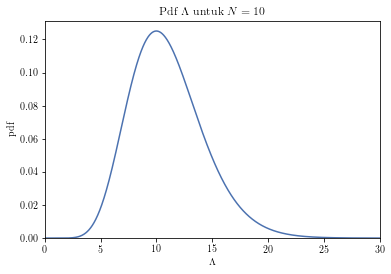

In [12]:
from scipy.stats import poisson

N = 10

x = np.linspace(0, 30, 1000)
y = poisson.pmf(N, x)

plt.plot(x, y)
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"pdf")
plt.ylim(0)
plt.xlim(0, x.max())
plt.title(r"Pdf $\Lambda$ untuk $N=10$")
plt.savefig(join('img', 'poisson-pdf.pdf'), dpi=70)
plt.show()

# Go

check out high error data

In [14]:
zs = gaia['z'].to_numpy()
ws = gaia['w'].to_numpy()
ews = gaia['e_w'].to_numpy()
p = gaia['parallax'].to_numpy()/1000
e_p = gaia['e_parallax'].to_numpy()/1000
vr = gaia['rv'].to_numpy()
e_vr = gaia['rv_el'].to_numpy()
mub = gaia['pmlat'].to_numpy()/1000
e_mub = gaia['e_pmlat'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()

mask = ~np.isnan(ws) & ~np.isnan(ews) 
ws = ws[mask]
ews = ews[mask]


med = np.median(ws)
mad = np.median(np.abs(ws-med))
BIN = 20
wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)
wedge

array([-30.86364999, -28.42611613, -25.98858226, -23.5510484 ,
       -21.11351453, -18.67598067, -16.23844681, -13.80091294,
       -11.36337908,  -8.92584522,  -6.48831135,  -4.05077749,
        -1.61324362,   0.82429024,   3.2618241 ,   5.69935797,
         8.13689183,  10.57442569,  13.01195956,  15.44949342,
        17.88702728])

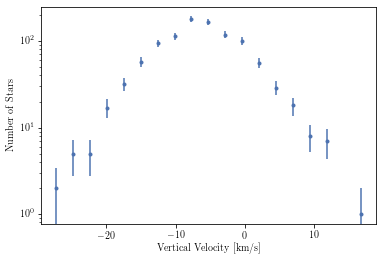

In [15]:
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wnum = wnum[mask]
wmid = wmid[mask]
werr = np.sqrt(wnum)
max = np.max(wnum)
# wnum, werr = wnum/max, werr/max
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.yscale("log")
# plt.axvline(-70)
plt.show()

In [16]:
from hammer import vertical

M = 100_000
# log_w = np.empty(M, dtype=float)
wnum_est = np.empty((M, len(wmid)), dtype=int)
n = len(ws)
mub_realizations = np.random.normal(loc=np.repeat(mub, M), scale=np.repeat(e_mub, M), size=n*M)
mub_realizations = mub_realizations.reshape((n, M)).transpose()
vr_realizations = np.random.normal(loc=np.repeat(vr, M), scale=np.repeat(e_vr, M), size=n*M)
vr_realizations = vr_realizations.reshape((n, M)).transpose()
r_realizations = vertical.generate_z(p, e_p, np.repeat(np.pi/2, n), n=M)
# for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(mub_realizations.transpose(), vr_realizations.transpose(), r_realizations)):
for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(tqdm(mub_realizations), vr_realizations, r_realizations)):
    # print(r_realization.shape)
    w_realization = 4.74 * r_realization * mub_realization*np.cos(b) + vr_realization*np.sin(b)
    wnum_est_i = np.histogram(w_realization, bins=wedge)[0]
    wnum_est[i] = wnum_est_i[mask]
# w_realization

100%|██████████| 100000/100000 [00:14<00:00, 7047.21it/s]


1.5081300258455022 0


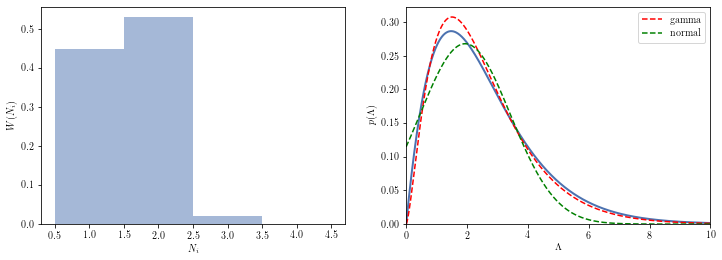

5.209325737602067 1


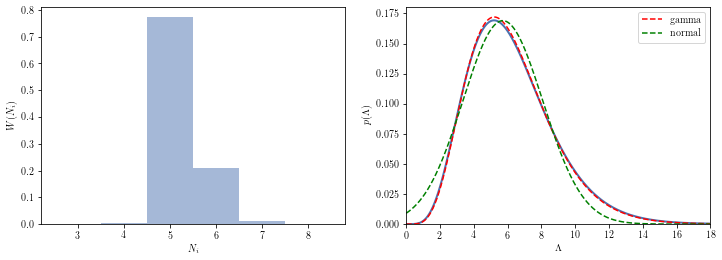

4.884743874607878 2


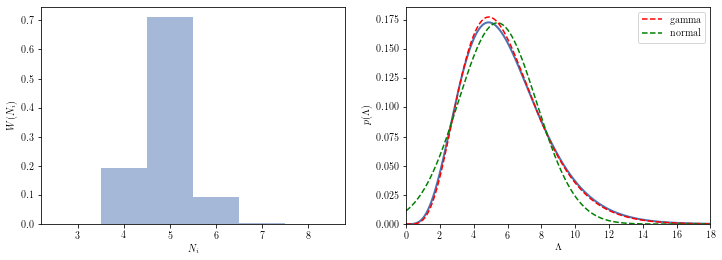

17.73653573466494 3


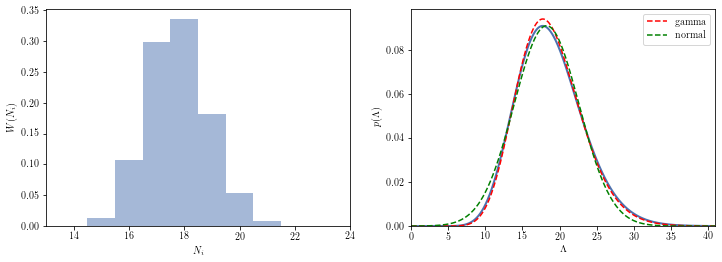

31.703569499036604 4


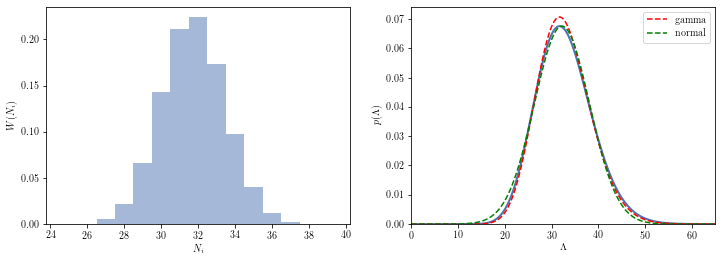

55.81725015680815 5


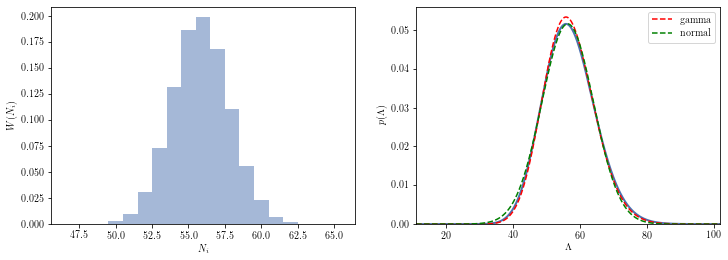

96.35286548361526 6


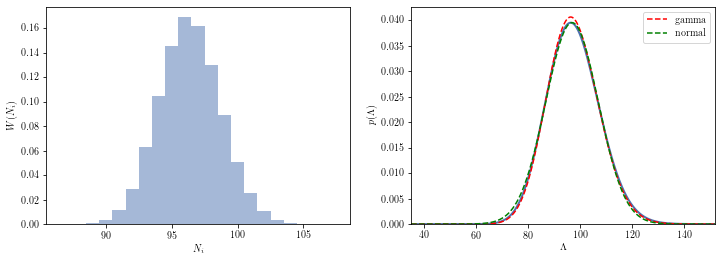

111.27672893180717 7


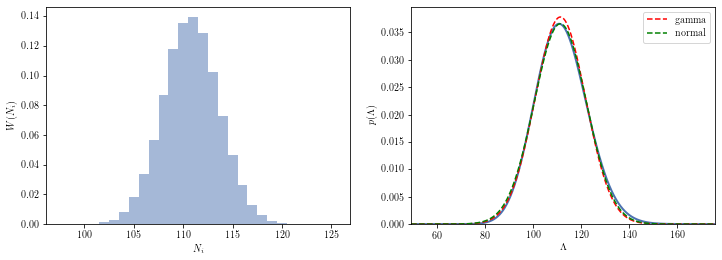

177.68743229808763 8


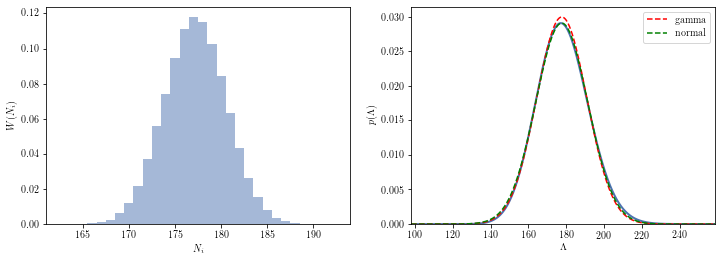

170.8727738648486 9


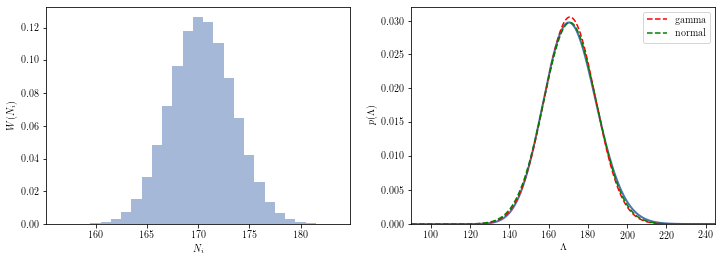

118.60733128713049 10


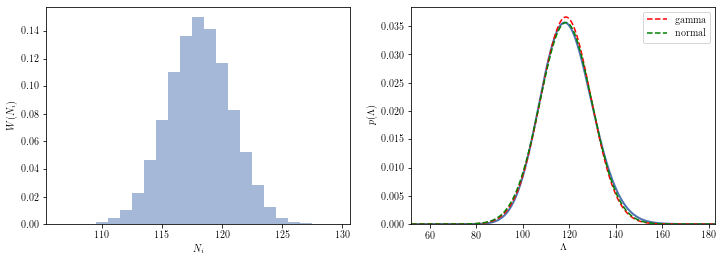

100.0 11


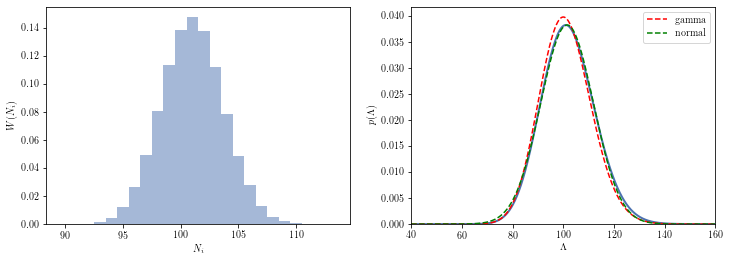

52.55565042693848 12


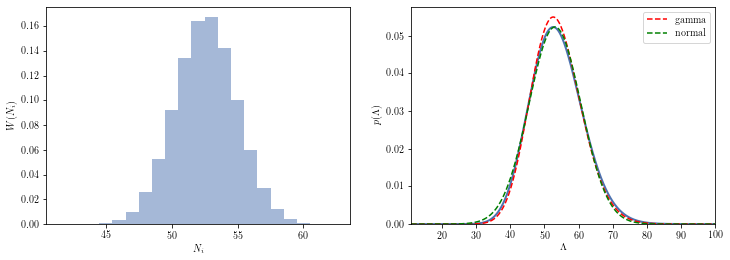

31.13430185778812 13


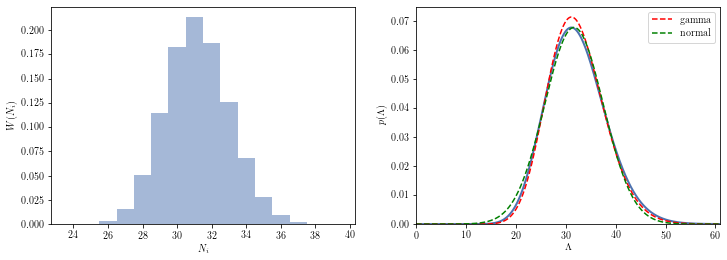

17.04856025765441 14


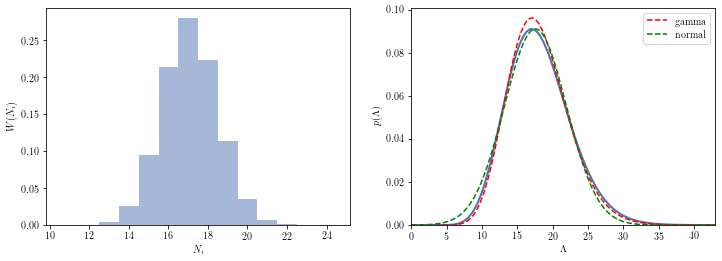

8.718641737850716 15


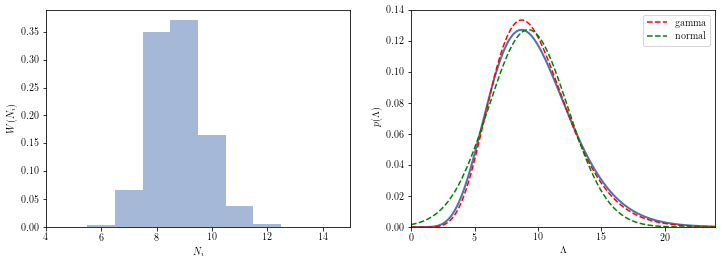

6.641005608397756 16


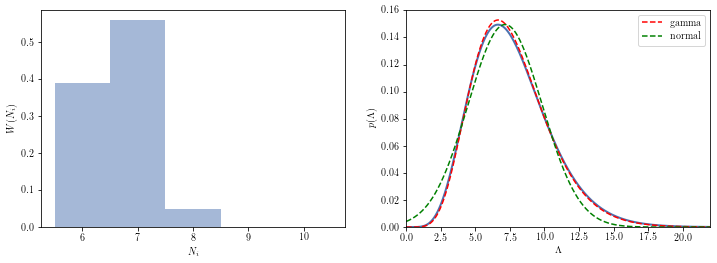

0.6558489600938183 17


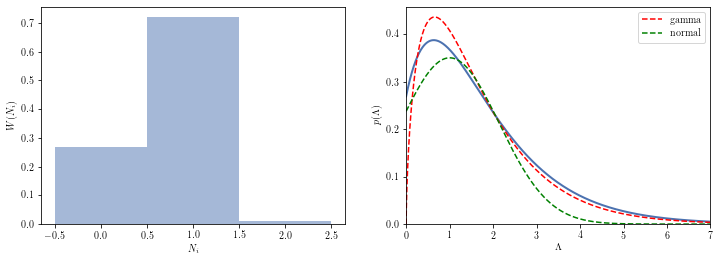

In [17]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, n, np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

west = np.empty_like(wnum, dtype=float)
for i in range(len(wmid)):
    # if i != 15:
    #     continue
    wnum_est_min = np.floor(wnum_est[:, i].min())
    wnum_est_max = np.ceil(wnum_est[:, i].max())
    bins = np.arange(wnum_est_min-1/2, wnum_est_max+1)
    weight, wn_edge = np.histogram(wnum_est[:, i], bins=bins, density=True)
    wn_mid = (wn_edge[1:] + wn_edge[:-1]) / 2
    mask = weight > 0
    weight = weight[mask]
    wn_mid = wn_mid[mask]
    m = 6
    west_x = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 10_000)
    dw = west_x[1] - west_x[0]
    pn = np.sum(weight[:, None]*poisson.pmf(wn_mid[:,None], west_x[None, :]), axis=0)
    area = np.trapz(pn, west_x)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, west_x, pn, p0=[wnum[i]])
    popt_n, _ = curve_fit(norm.pdf, west_x, pn, p0=[wnum[i], np.sqrt(wnum[i])])
    west[i] = popt_g[0]

    print(popt_g[0], i)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].bar(wn_mid, weight, width=1, alpha=0.5)
    ax[0].set_xlabel(r"$N_i$")
    ax[0].set_ylabel(r"$W(N_i)$")
    ax[1].plot(west_x, pn, c='C0', lw=2)
    ax[1].plot(west_x, p_approx(west_x, *popt_g), label='gamma', ls="--", c='r')
    ax[1].plot(west_x, norm.pdf(west_x, *popt_n), label='normal', ls="--", c='g')
    # ax[1].axvline(wnum[i], c='C3', ls='--', label='asli')
    ax[1].set_xlabel(r"$\Lambda$")
    ax[1].set_ylabel(r"$p(\Lambda)$")
    ax[1].set_ylim(0)
    ax[1].set_xlim(west_x.min(), west_x.max())
    ax[1].legend()
    # fig.savefig(join("img", f"histogram-approx-1.pdf"), dpi=70)
    plt.show()
    
    # break

In [18]:
west

array([  1.50813003,   5.20932574,   4.88474387,  17.73653573,
        31.7035695 ,  55.81725016,  96.35286548, 111.27672893,
       177.6874323 , 170.87277386, 118.60733129, 100.        ,
        52.55565043,  31.13430186,  17.04856026,   8.71864174,
         6.64100561,   0.65584896])

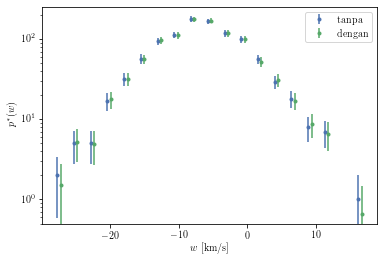

In [19]:
dw = np.min(np.diff(wedge))
plt.errorbar(wmid-0.5, wnum, yerr=werr, fmt='.', label="tanpa")
plt.errorbar(wmid, west, yerr=np.sqrt(west), fmt='.', label="dengan")
plt.xlabel(r"$w$ [km/s]")
plt.ylabel(r"$p^{*}(w)$")
plt.legend()
plt.yscale('log')
plt.savefig(join("img", f"histogram-w.pdf"), dpi=70)
plt.show()

In [20]:
name = files[index].split("/")[-1].replace("gaia", "w")
df = vaex.from_arrays(mid=wmid, num=west)
df

#    mid                  num
0    -27.207349194286714  1.5081300258455022
1    -24.769815330544116  5.209325737602067
2    -22.33228146680152   4.884743874607878
3    -19.894747603058917  17.73653573466494
4    -17.457213739316316  31.703569499036604
...  ...                  ...
13   4.48059103436708     31.13430185778812
14   6.9181248981096815   17.04856025765441
15   9.355658761852283    8.718641737850716
16   11.793192625594884   6.641005608397756
17   16.66826035308008    0.6558489600938183

In [21]:
name

'w_(-0.019)_(0.127).hdf5'

In [22]:
vel_dir

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no'

In [23]:
df.export(join(vel_dir, name), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

# automate finding histogram with error

In [24]:
files

['/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.325)_(0.335).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.335)_(0.345).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.345)_(0.355).hdf5',
 '/home2/s2

100%|██████████| 50000/50000 [00:07<00:00, 6534.01it/s]


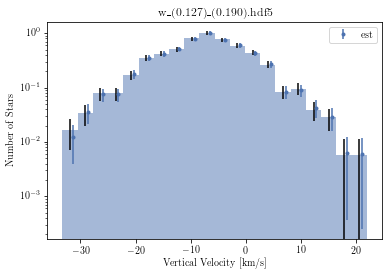

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.127)_(0.190).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6702.53it/s]


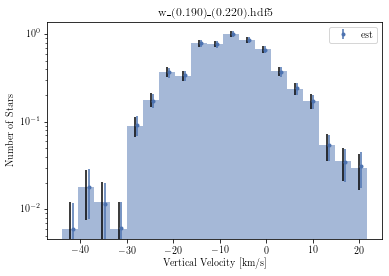

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.190)_(0.220).hdf5


In [25]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, n, np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for file in files[1:]:
    gaia = vaex.open(file)
    gaia = gaia.filter("abs(z)<50").filter("rv>-999")
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    ews = gaia['e_w'].to_numpy()
    p = gaia['parallax'].to_numpy()/1000
    e_p = gaia['e_parallax'].to_numpy()/1000
    vr = gaia['rv'].to_numpy()
    e_vr = gaia['rv_el'].to_numpy()
    mub = gaia['pmlat'].to_numpy()/1000
    e_mub = gaia['e_pmlat'].to_numpy()/1000
    b = gaia['GLAT'].to_numpy()
    mask = ~np.isnan(ws) & ~np.isnan(ews)
    ws = ws[mask]
    ews = ews[mask]

    med = np.median(ws)
    mad = np.median(np.abs(ws-med))
    BIN = 21
    wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)

    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    # mask = (wnum == 0) | ((wmid < -30) & (wmid > -45)) | (wmid < -70)
    mask = (wnum == 0)
    wnum = wnum[~mask]
    wmid = wmid[~mask]
    werr = np.sqrt(wnum)
    max = np.max(wnum)
    
    # plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
    # plt.xlabel("Vertical Velocity [km/s]")
    # plt.ylabel("Number of Stars")
    # plt.yscale('log')
    # plt.show()
    # continue
    # break
    M = 50_000
    # log_w = np.empty(M, dtype=float)
    wnum_est = np.empty((M, len(wmid)), dtype=int)
    n = len(ws)
    mub_realizations = np.random.normal(loc=np.repeat(mub, M), scale=np.repeat(e_mub, M), size=n*M)
    mub_realizations = mub_realizations.reshape((n, M)).transpose()
    vr_realizations = np.random.normal(loc=np.repeat(vr, M), scale=np.repeat(e_vr, M), size=n*M)
    vr_realizations = vr_realizations.reshape((n, M)).transpose()
    r_realizations = vertical.generate_z(p, e_p, np.repeat(np.pi/2, n), n=M)
    # for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(mub_realizations.transpose(), vr_realizations.transpose(), r_realizations)):
    for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(tqdm(mub_realizations), vr_realizations, r_realizations)):
        # print(r_realization.shape)
        w_realization = 4.74 * r_realization * mub_realization*np.cos(b) + vr_realization*np.sin(b)
        wnum_est_i = np.histogram(w_realization, bins=wedge)[0]
        wnum_est[i] = wnum_est_i[~mask]
    west = np.empty_like(wnum, dtype=float)
    for i in range(len(wmid)):
        wnum_est_min = np.floor(wnum_est[:, i].min())
        wnum_est_max = np.ceil(wnum_est[:, i].max())
        bins = np.arange(wnum_est_min-1/2, wnum_est_max+1)
        weight, wn_edge = np.histogram(wnum_est[:, i], bins=bins, density=True)

        wn_mid = (wn_edge[1:] + wn_edge[:-1]) / 2
        mask = weight > 0
        weight = weight[mask]
        wn_mid = wn_mid[mask]
        m = 6
        # plt.bar(wn_mid, weight, width=1, alpha=0.5)
        west_x = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 1_000)
        dw = west_x[1] - west_x[0]
        pn = np.sum(weight[:, None]*poisson.pmf(wn_mid[:,None], west_x[None, :]), axis=0)
        area = np.trapz(pn, west_x)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, west_x, pn, p0=[wnum[i]])
        popt_n, _ = curve_fit(norm.pdf, west_x, pn, p0=[wnum[i], np.sqrt(wnum[i])])
        west[i] = popt_g[0]
        # fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        # ax[0].bar(wn_mid, weight, width=1, alpha=0.5, edgecolor='k')
        # ax[0].set_xlabel(r"$N_i$")
        # ax[0].set_ylabel(r"$W(N_i)$")
        # ax[1].plot(west_x, pn, c='C0', lw=2)
        # ax[1].plot(west_x, p_approx(west_x, *popt_g), label='gamma', ls="--", c='r')
        # ax[1].plot(west_x, norm.pdf(west_x, *popt_n), label='normal', ls="--", c='g')
        # # ax[1].axvline(wnum[i], c='C3', ls='--', label='asli')
        # ax[1].set_xlabel(r"$\Lambda$")
        # ax[1].set_ylabel(r"$p(\Lambda)$")
        # ax[1].set_ylim(0)
        # ax[1].set_xlim(west_x.min(), west_x.max())
        # ax[1].legend()
        # # fig.savefig(join("img", f"histogram-approx-1.pdf"), dpi=70)
        # plt.show()
    #     break
    # break
    name = file.split("/")[-1].replace("gaia", "w")
    dw = np.min(np.diff(wedge))
    plt.bar(wmid-0.5, wnum/wnum.max(), yerr=werr/wnum.max(), width=dw, alpha=0.5)
    plt.errorbar(wmid, west/west.max(), yerr=np.sqrt(west)/west.max(), fmt='.', label="est")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.title(name)
    plt.yscale('log')
    plt.show()
    
    
    df = vaex.from_arrays(mid=wmid, num=west)

    df.export(join(vel_dir, name), progress=True)
    print("saved", name) 
    # break

# MCMC

In [19]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [20]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [21]:
# from utils import (plot_corner, plot_chain, plot_fit_w, style, get_params,
#                    get_initial_position_normal, get_data, generate_init, Model)

from utils import style

style()

In [23]:
root_data_dir = join(root_dir, "Data")
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [22]:
vel_dir = join(root_data_dir, "Velocity-Distribution", "no")
vel_dir

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no'

In [24]:
files = glob(join(vel_dir, "w*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(-0.10)_(0.13).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.13)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.19)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.27)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.33)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no/w_(0.38)_(0.40).hdf5']

In [8]:
def get_data(path: str):
    """
    Get data from path

    Parameters
    ----------
    path: `str`
        path to data

    Returns
    -------
    data: `tuple` = (mid: `ndarray`, num`ndarray`: `ndarray`, err: `ndarray`)
    """
    data = vaex.open(path)

    mid = data['mid'].to_numpy()
    num = data['num'].to_numpy()

    data = (mid, num)
    return data

In [9]:
index = 8
file = files[index]
wdata = get_data(file)
wdata

(array([-66.20659808, -62.14497765, -58.08335721, -54.02173678,
        -49.96011635, -45.89849592, -29.6520142 , -25.59039377,
        -21.52877333, -17.4671529 , -13.40553247,  -9.34391204,
         -5.28229161,  -1.22067118,   2.84094925,   6.90256968,
         10.96419011,  15.02581055,  19.08743098,  23.14905141,
         27.21067184,  31.27229227,  35.3339127 ,  39.39553313,
         43.45715356,  47.51877399,  51.58039442]),
 array([  1.78890733,   2.03034317,   7.8392711 ,   9.22596615,
         17.31660337,  29.42812602,  78.80842954,  77.60068198,
        129.11665659, 170.        , 223.        , 267.        ,
        281.        , 234.        , 158.        , 128.05766515,
        111.69722331,  82.33762272,  42.30390653,  31.93731012,
         21.26468746,  19.93715358,  16.69616385,   6.92718222,
         12.97979307,   6.24147173,   7.77771869]))

In [10]:
# init kinematic
w0_init = {'low': -15, 'high': 0., 'value': -
           7., 'label': r'$w_0$', 'lab': 'w0'}
log_sigmaw_init = {'low': np.log(3), 'high': np.log(50), 'value': np.log(
    5), 'label': r'$\log \sigma_{w}$', 'lab': 'log_sigmaw'}
q_sigmaw_init = {'low': 0, 'high': 1, 'value': 0.5, 'label': r'$q_{w}$', 'lab': 'q_sigmaw'}
log_a_init = {'mean': 0., 'sigma': 2., 'value': 0.,
               'label': r'$\log a$', 'lab': 'log_a'}
q_a_init = {'low': 0.01, 'high': 1., 'value': 0.5,
               'label': r'$q_a$', 'lab': 'q_a'}
log_phi_b_init = {'low': 0., 'high': 10., 'value': 2.,
                'label': r'$\log \Phi_b$', 'lab': 'log_phi_b'}

init_kin = [w0_init, log_sigmaw_init, q_sigmaw_init, log_a_init, q_a_init, log_phi_b_init]

def flatten_array(arr: np.ndarray):
    flattened = []
    for item in arr:
        if isinstance(item, np.ndarray):
            flattened.extend(flatten_array(item))
        else:
            flattened.append(item)
    return np.array(flattened)


def generate_init_kin(log_max: float):
    """
    Generate initial values for the model
    
    Parameters
    ----------
    model: `Model` = `Model.DM`, `Model.DDDM`, `Model.NO`

    Returns
    -------
    init: `dict` = {
        theta: `np.ndarray`, \n
        locs: `np.ndarray`, \n
        scales: `np.ndarray`, \n
        labels: `np.ndarray`, \n
        labs: `np.ndarray,` \n
        indexes: `np.ndarray` \n
        }
    """
    # if not model in init_dict.keys():
    #     raise ValueError(f"model must be {init_dict.keys()}")
    init = init_kin

    theta = np.array([])
    locs = np.array([])
    scales = np.array([])
    labs= np.array([])
    labels= np.array([])
    indexes = []

    for i, init_i in enumerate(init):
        if 'low' in init_i.keys():
            locs = np.append(locs, init_i['low'])
            scales = np.append(scales, init_i['high'] - init_i['low'])
            theta = np.append(theta, init_i['value'])
        elif 'mean' in init_i.keys():
            if init_i['lab'] == 'log_a':
                locs = np.append(locs, log_max + init_i['mean'])
                scales = np.append(scales, init_i['sigma'])
                theta = np.append(theta, log_max + init_i['value'])
            else:    
                locs = np.append(locs, init_i['mean'])
                scales = np.append(scales, init_i['sigma'])
                theta = np.append(theta, init_i['value'])
        else:
            raise ValueError("malformed init")
        labels = np.append(labels, init_i['label'])
        labs = np.append(labs, init_i['lab'])
        indexes.append(i)
    theta = flatten_array(theta)
    locs = flatten_array(locs)
    scales = flatten_array(scales)
    
    return dict(
        theta=theta, 
        locs=locs, 
        scales=scales, 
        labels=labels,
        labs=labs,
        indexes=indexes
    )

In [11]:
from hammer import vel
log_max = np.log(wdata[1].max())
res = generate_init_kin(log_max)
res.keys()

dict_keys(['theta', 'locs', 'scales', 'labels', 'labs', 'indexes'])

In [12]:
theta = res['theta']
locs = res['locs']
scales = res['scales']
labs = res['labs']
labels = res['labels']

[(lb, l, t, s+l) for lb,  l, t,s in zip(labels, locs, theta, scales)]

[('$w_0$', -15.0, -7.0, 0.0),
 ('$\\log \\sigma_{w}$',
  1.0986122886681098,
  1.6094379124341003,
  3.9120230054281464),
 ('$q_{w}$', 0.0, 0.5, 1.0),
 ('$\\log a$', 5.638354669333745, 5.638354669333745, 7.638354669333745),
 ('$q_a$', 0.01, 0.5, 1.0),
 ('$\\log \\Phi_b$', 0.0, 2.0, 10.0)]

In [13]:
ndim = len(labs)
nwalker = 10*ndim
p0 = None
p0 = vel.generate_p0(nwalker, locs, scales)
p0.shape

(60, 6)

In [14]:
from scipy.stats import median_abs_deviation as mad

def get_initial_position_normal(log_max: float, chain: np.ndarray):
    """
    Get initial position for the next run in normalized form

    Parameters
    ----------
    model: `Model` = `Model.DM`, `Model.DDDM`, or `Model.NO`\n
    chain: `ndarray(shape(nstep,nwalker,nparam))`

    Returns
    -------
    init: `tuple` = (locs: `ndarray`, scales: `ndarray`)
    """
    init = generate_init_kin(log_max)
    labs = init['labs']
    locs = init['locs']
    scales = init['scales']
    indexes = init['indexes']
    for lab, index in zip(labs, indexes):
        if lab == "rhob":
            continue
        v = chain[:, :, index]
        flat_raw = v.reshape(-1)
        mad_v = mad(flat_raw)
        median_v = np.median(flat_raw)
        locs[index] = median_v
        scales[index] = mad_v
    return locs, scales

In [15]:
indexes = list(range(ndim))

for _ in tqdm(range(5)):
    chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
    locs_normal, scales_normal = get_initial_position_normal(log_max, chain=chain[1000:])
    p0 = vel.generate_p0(nwalker, locs_normal, scales_normal, norm=True)
    print(p0.shape)
    chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
    p0 = chain[-1]

  0%|          | 0/5 [00:00<?, ?it/s]

(60, 6)


 40%|████      | 2/5 [00:02<00:04,  1.45s/it]

(60, 6)


 60%|██████    | 3/5 [00:04<00:02,  1.46s/it]

(60, 6)


 80%|████████  | 4/5 [00:06<00:01,  1.53s/it]

(60, 6)


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]

(60, 6)


In [16]:
chain = vel.mcmc(100_000, p0, wdata, locs, scales, parallel=True, verbose=True)
chain_thin = chain[::100]

100%|██████████| 6/6 [00:00<00:00, 44.43it/s]


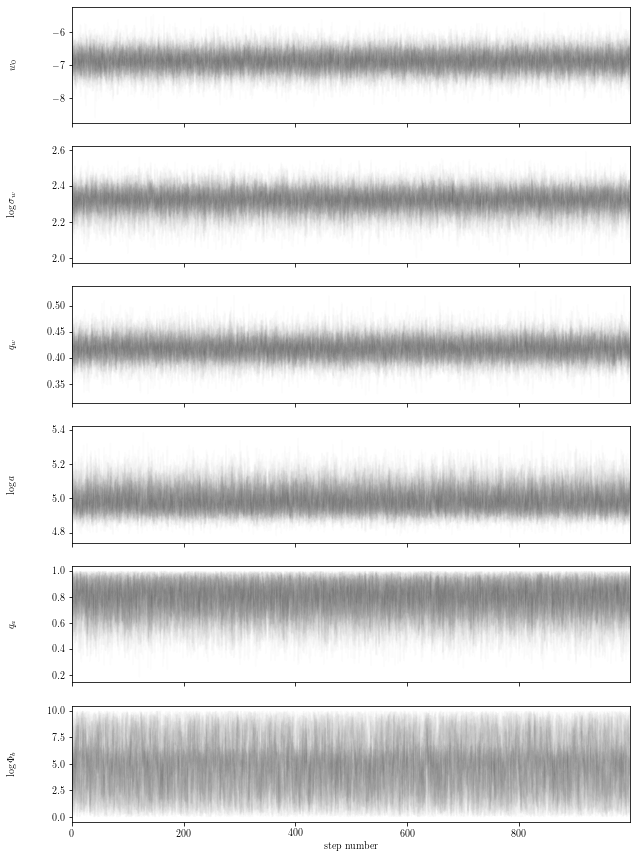

In [17]:
from utils import get_params, plot_chain

params = get_params(chain_thin, indexes, labs)
# params = get_params(chain, indexes, labs)

plot_chain(params=params, labels=labels, alpha=0.01)

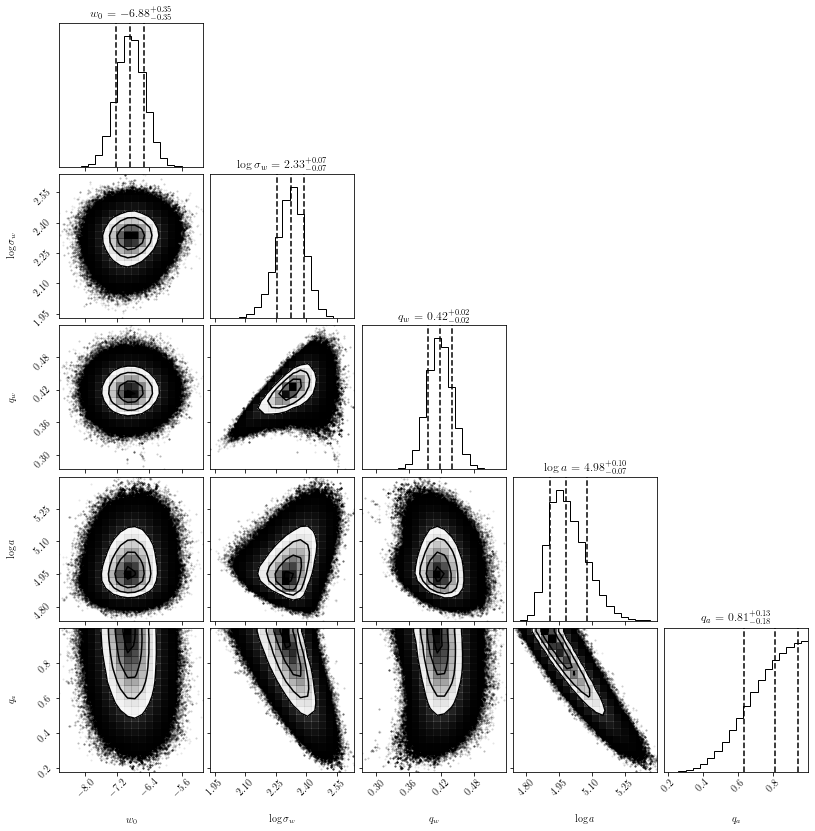

In [18]:
from utils import plot_corner

params = get_params(chain, indexes, labs)

plot_corner(params=params[:,:, :-1], labels=labels[:-1])

In [19]:
from matplotlib import pyplot as plt
from typing import Tuple

def plot_fit(flat_chain: np.ndarray, wdata: Tuple[np.ndarray, np.ndarray], **options: dict):
    """required: 
            model: `Model` = Model.DM \n
            flat_chain: `ndarray(shape=(nsample, nparam))`\n
            zdata: `Tuple[np.ndarray, np.ndarray, np.ndarray]` \n
            wdata: `Tuple[np.ndarray, np.ndarray, np.ndarray]` \n
            baryon: `ndarray` = [...rhob, ...sigmaz] \n
        options:
            name: `str` = None \n
            res: `int` = 100 \n
            nsample: `int` = 5_000 \n
            figsize: `Tuple[int, int]` = (10, 10) \n
            alpha: `float` = 0.1 \n
            c: `str` = C0 \n
            log: `bool` = False \n
            dpi: `int` = 70 \n
            path: `str` = None \n
            fig_kw: `Dict` = All additional keyword arguments for `.pyplot.figure`.
            """
    name = options.get('name', None)
    res = options.get('res', 100)
    nsample = options.get('nsample', 5_000)
    figsize = options.get('figsize', (10, 6))
    alpha = options.get('alpha', 0.1)
    c = options.get('c', "C0")
    log = options.get('log', False)
    dpi = options.get('dpi', 70)
    path = options.get('path', None)
    fig_kw  = options.get('fig_kw', {})
    # func = func_dict.get(model.value, HammerModel.DM)

    wmid, wnum = wdata
    werr = np.sqrt(wnum)
    ws: np.ndarray[np.float64] = np.linspace(wmid.min()*1.1, wmid.max()*1.1, res)
    log_fws = np.empty((nsample, len(ws)))
    for i in tqdm(range(nsample)):
        while True:
            ind = np.random.randint(len(flat_chain))
            theta = flat_chain[ind]
            log_fw_propose = np.log(vel.fw(ws, theta))
            if any(np.isnan(log_fw_propose)):
                continue
            log_fws[i] = log_fw_propose
            break

    fig, ax = plt.subplots(1, 1, figsize=figsize, **fig_kw)
    # for ax, xlabel, ylabel, log_val, vs, mid, num, err in zip(axes, [r'$w$ [km/s]'], [r'$f_0(w)$'], [log_fws], [ws], [wmid], [wnum], [werr]):
    ax.errorbar(wmid, wnum, yerr=werr, color='k',
                alpha=1, capsize=2, fmt=".")
    log_median = np.median(log_fws, axis=0)
    ax.plot(ws, np.exp(log_median), c=c, ls="--")
    log_up = None
    log_down = None
    for sigma in [0.95, 0.9, 0.68]:
        log_up = np.quantile(log_fws, sigma, axis=0)
        log_down = np.quantile(log_fws, 1-sigma, axis=0)
        ax.fill_between(ws, np.exp(log_up),
                        np.exp(log_down), alpha=alpha, color=c)
    ax.set_ylabel(r"$f_0(w)$")
    ax.set_xlabel(r"$w$ [km/s]")
    ax.set_xlim(ws.min(), ws.max())
    if log:
        ax.set_yscale("log")
        ax.set_ylim(np.exp(log_down).min(),
                    np.exp(log_up).max()*1.5)
    else:
        ax.set_ylim(0)
    # fig.tight_layout()
    fig.suptitle(name)
    if path is not None:
        fig.savefig(path, dpi=dpi)
    plt.show()

In [22]:
index

8

100%|██████████| 10000/10000 [00:00<00:00, 24275.11it/s]


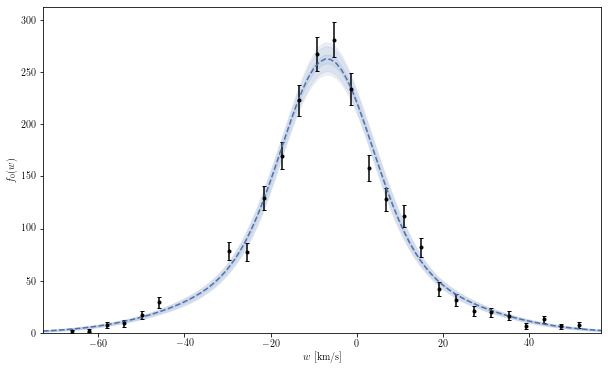

In [21]:
flat_chain = chain_thin.reshape(-1, ndim)

plot_fit(flat_chain=flat_chain, wdata=wdata, nsample=10_000, log=True)

## automate

In [18]:
from glob import glob
from os.path import join, abspath
import sys
from os import pardir
from tqdm import tqdm

In [19]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [20]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project',
 '/home2/s20321005/Thesis-Project']

In [21]:
from utils import (plot_corner, plot_chain, plot_fit_w, style, get_params,
                   get_initial_position_normal, get_data, generate_init, Model)

In [22]:
style()

In [23]:
data_dir = join(root_data_dir, "MCMC-no", "vel")

In [24]:
w_dir_path = join(root_data_dir, 'Velocity-Distribution-no')
w_dir_path

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no'

(0.11)_(0.16)


 20%|██        | 1/5 [00:00<00:03,  1.17it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.19it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

(60, 6)
(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 21.67it/s]


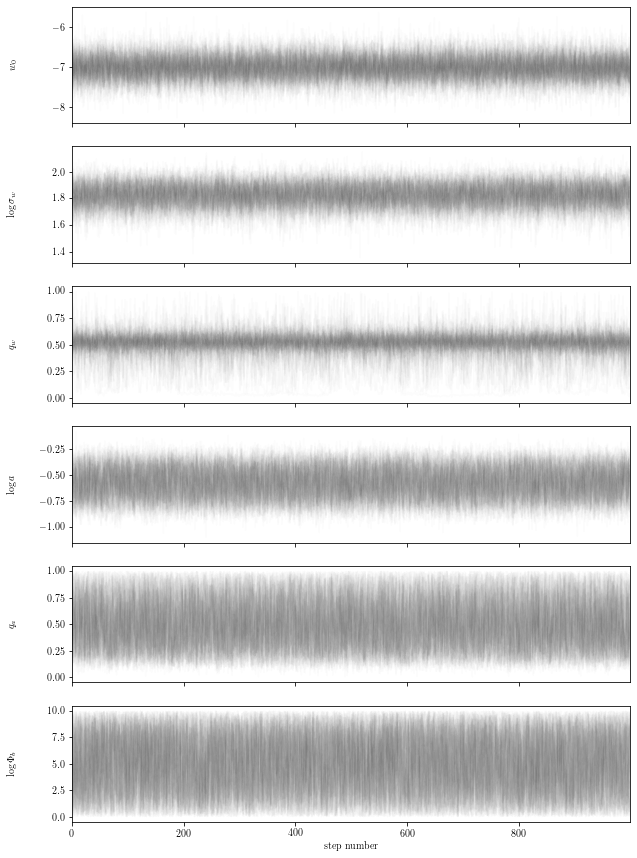

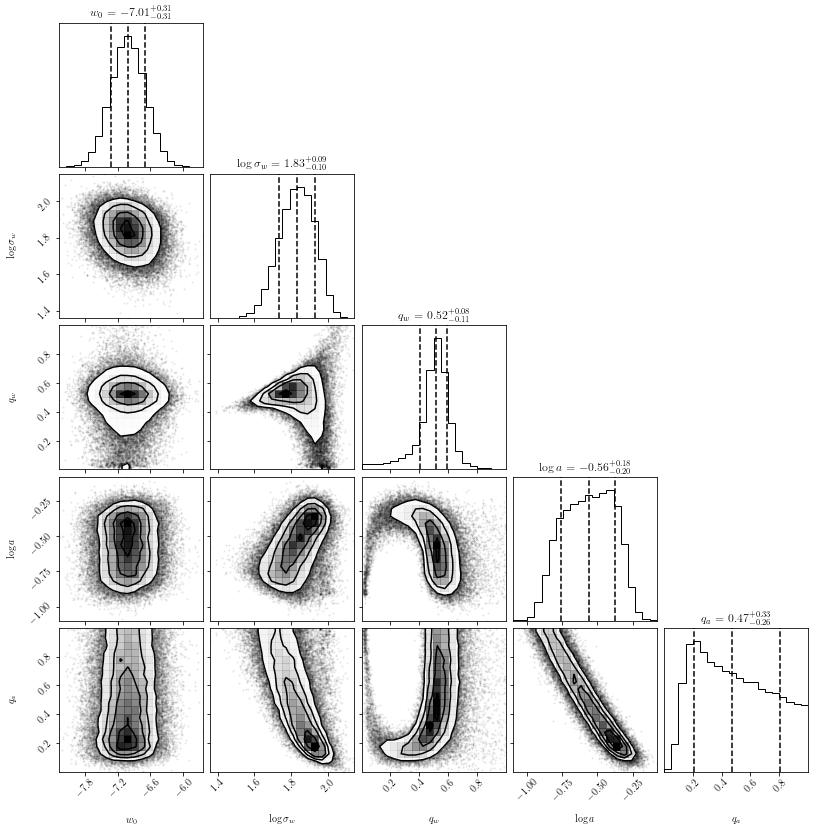

100%|██████████| 5000/5000 [00:00<00:00, 33235.95it/s]


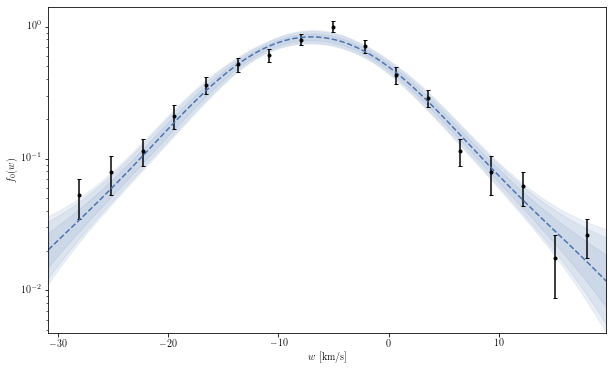

saved (0.11)_(0.16)
(0.16)_(0.20)


 20%|██        | 1/5 [00:00<00:03,  1.13it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.18it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.21it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 47.46it/s]


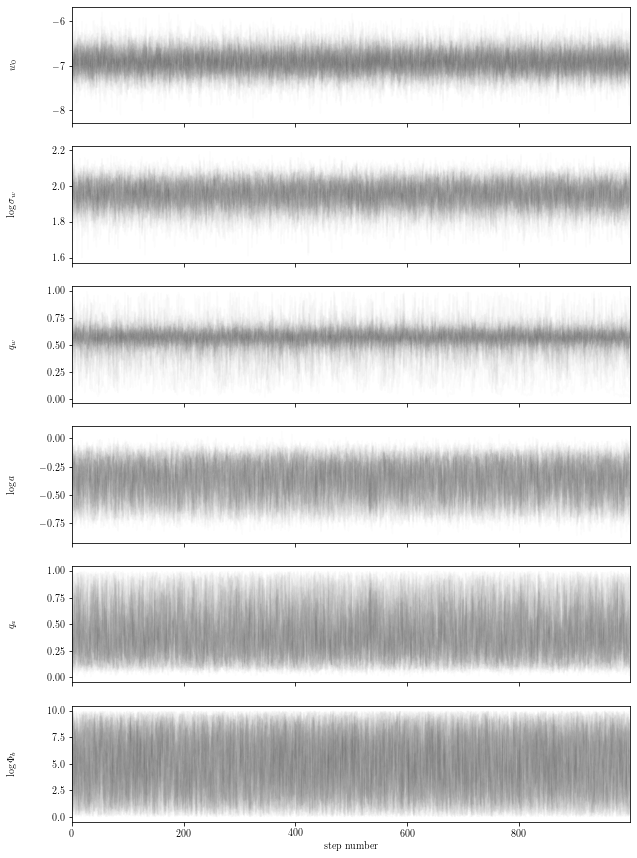

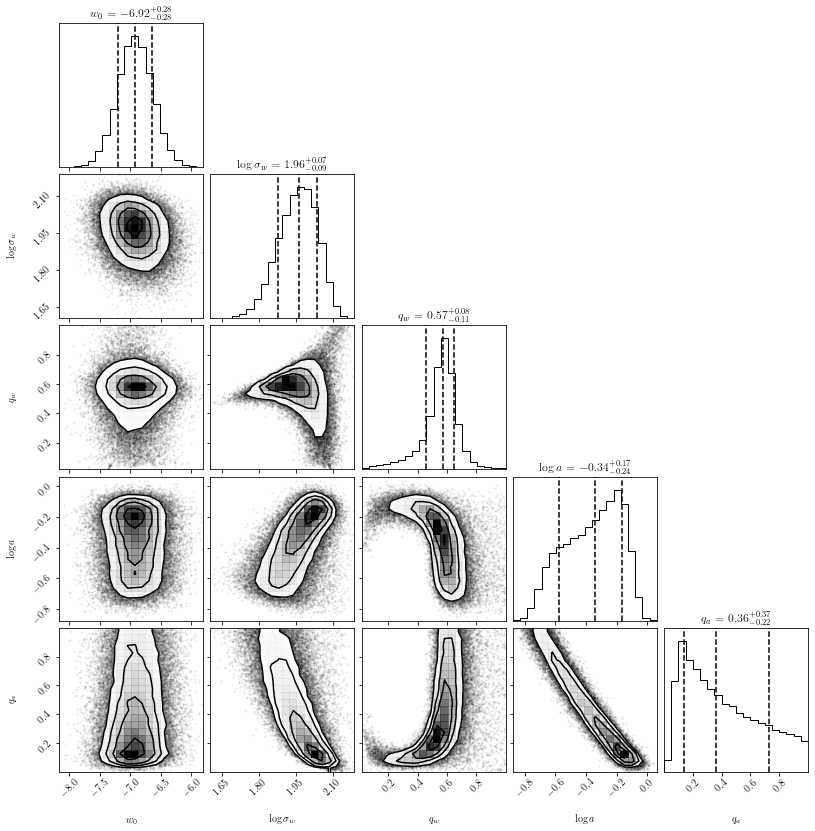

100%|██████████| 5000/5000 [00:00<00:00, 35662.15it/s]


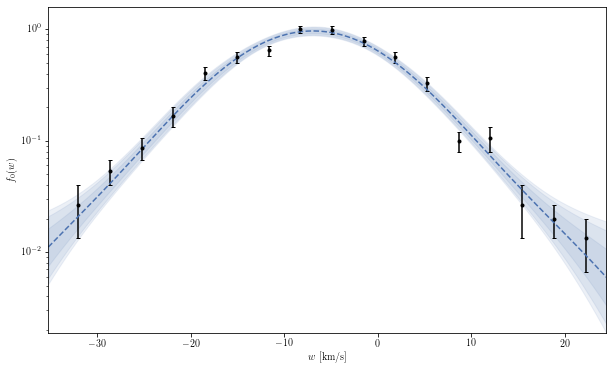

saved (0.16)_(0.20)
(0.20)_(0.24)


 20%|██        | 1/5 [00:00<00:03,  1.05it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.09it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.13it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.14it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 49.96it/s]


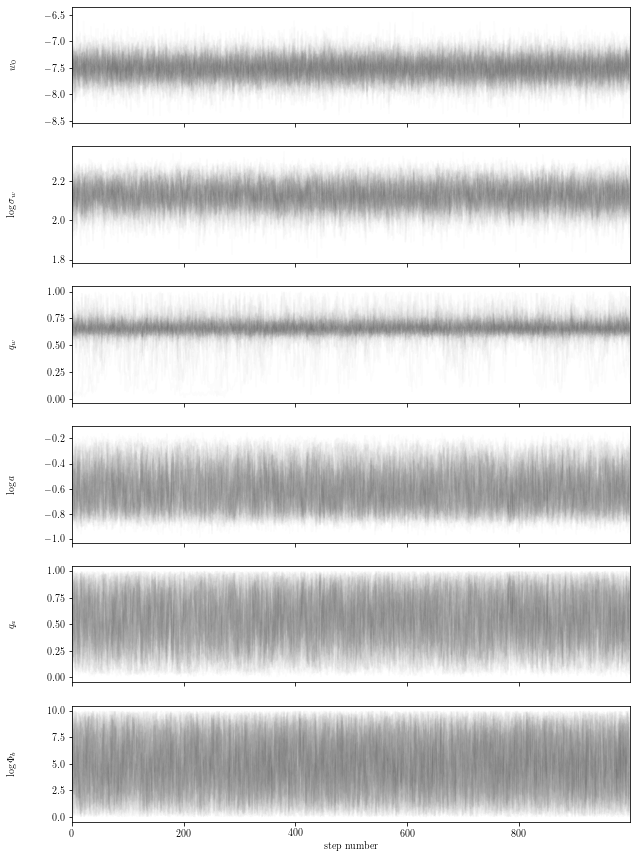

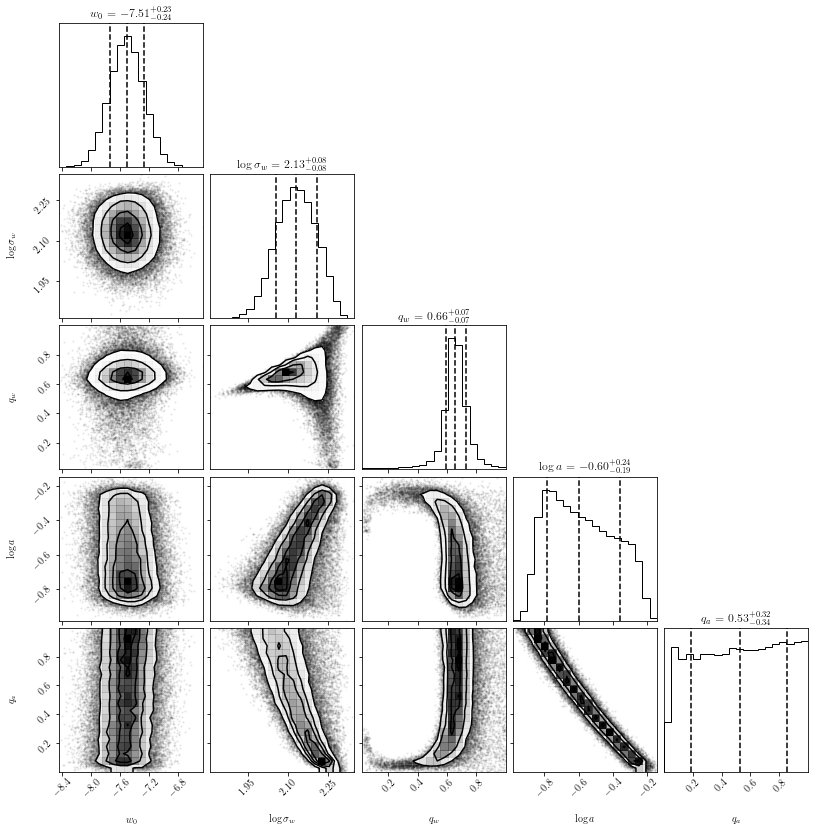

100%|██████████| 5000/5000 [00:00<00:00, 34732.91it/s]


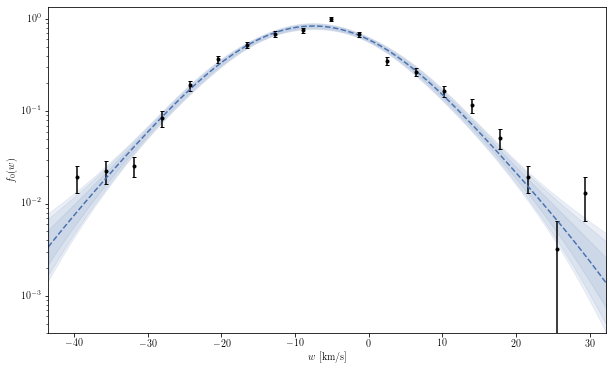

saved (0.20)_(0.24)
(0.24)_(0.27)


 20%|██        | 1/5 [00:00<00:03,  1.11it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.04it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:02,  1.01s/it]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.03it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 41.77it/s]


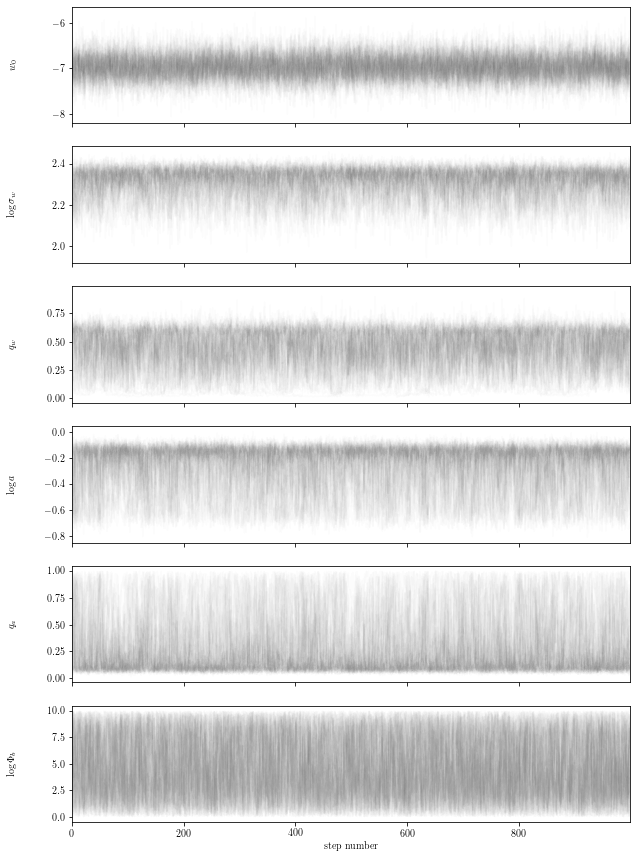

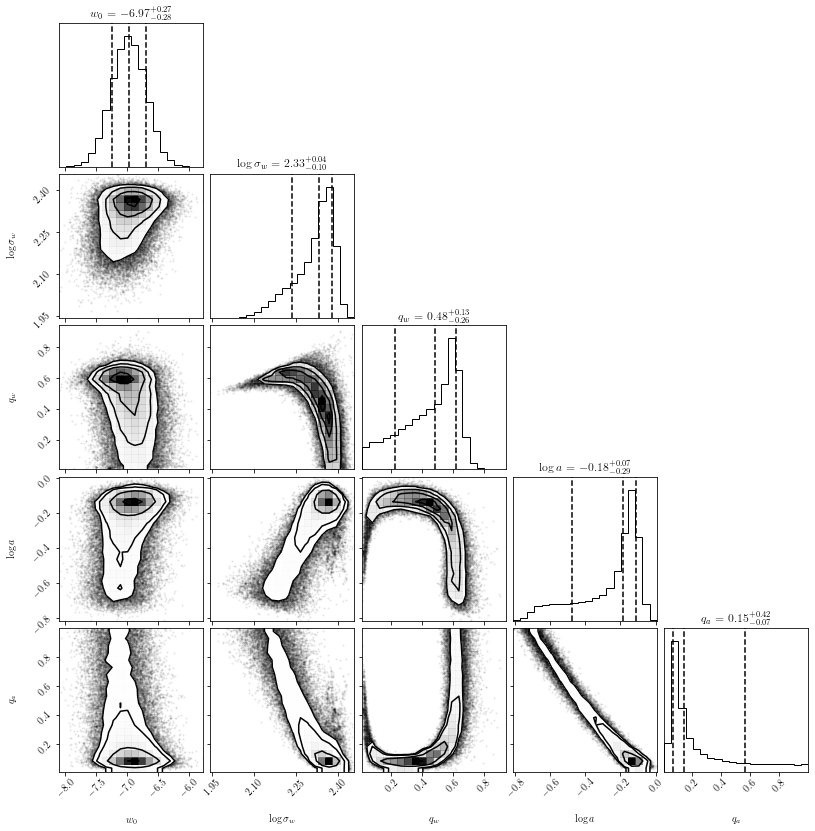

100%|██████████| 5000/5000 [00:00<00:00, 33439.72it/s]


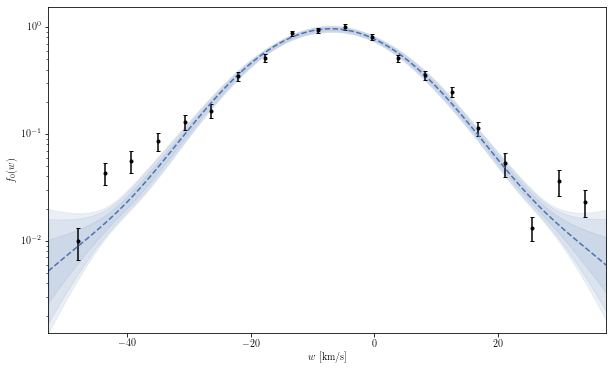

saved (0.24)_(0.27)
(0.27)_(0.29)


 20%|██        | 1/5 [00:00<00:03,  1.09it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.11it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.09it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.10it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 19.57it/s]


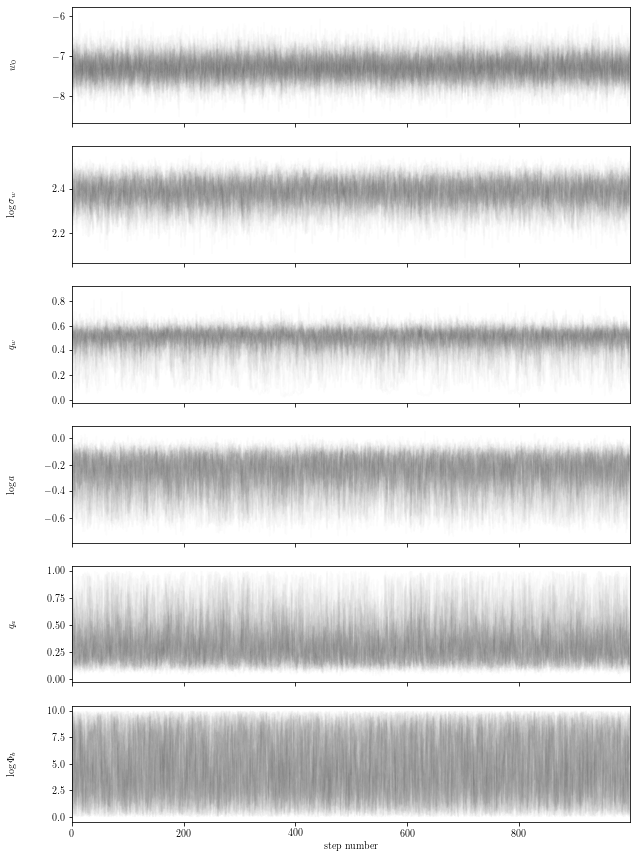

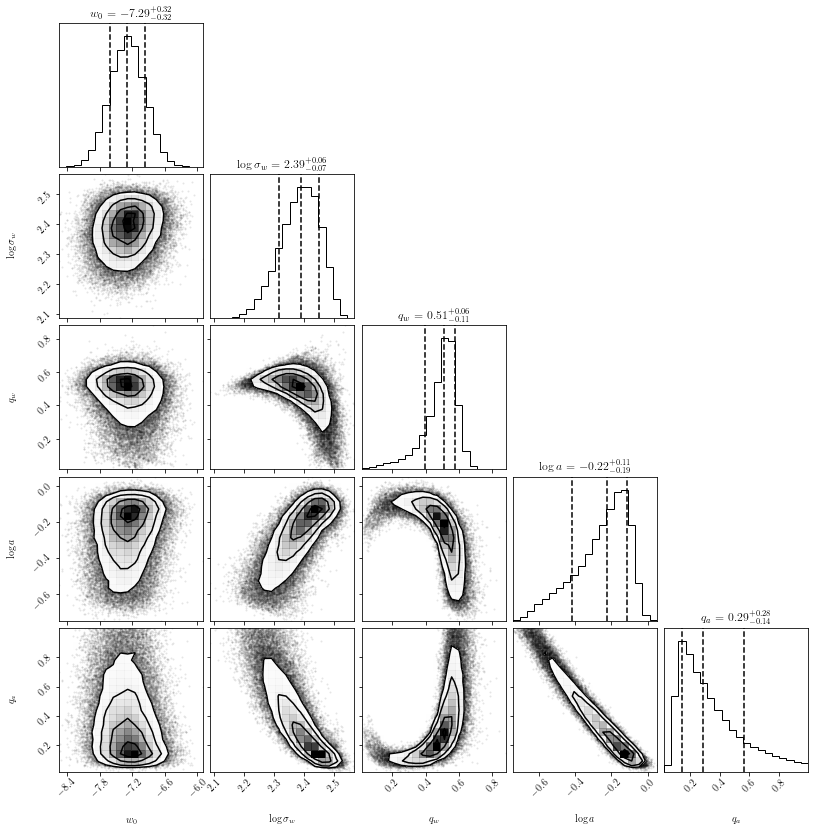

100%|██████████| 5000/5000 [00:00<00:00, 34668.65it/s]


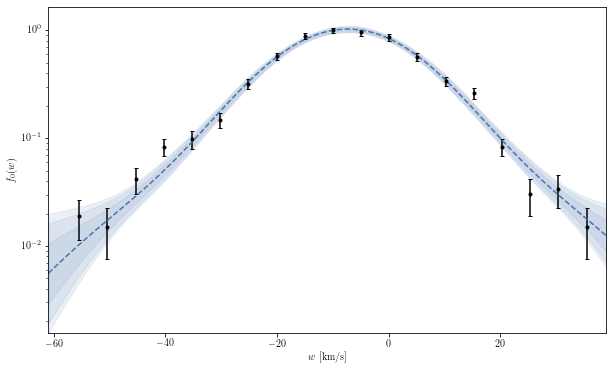

saved (0.27)_(0.29)
(0.29)_(0.31)


 20%|██        | 1/5 [00:00<00:03,  1.06it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.09it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.08it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.10it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 47.32it/s]


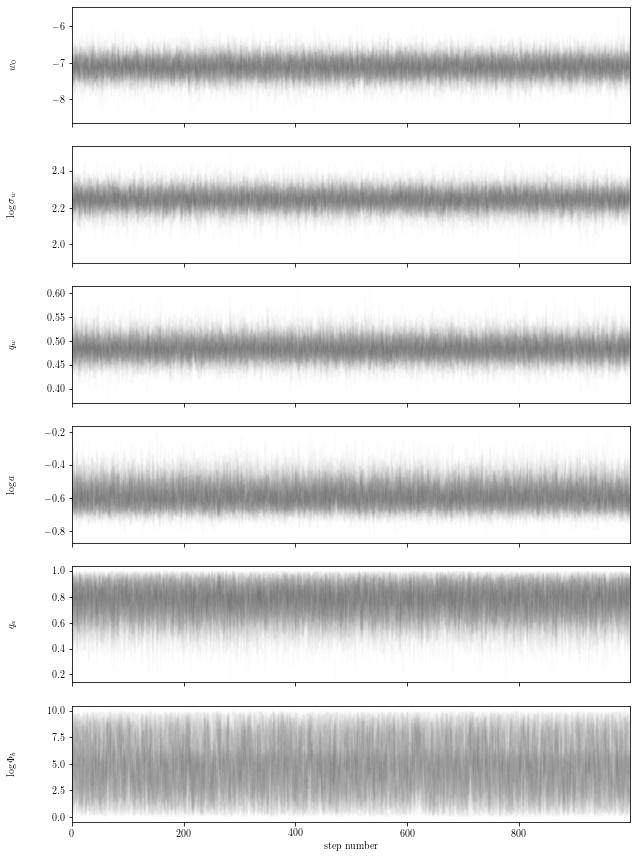

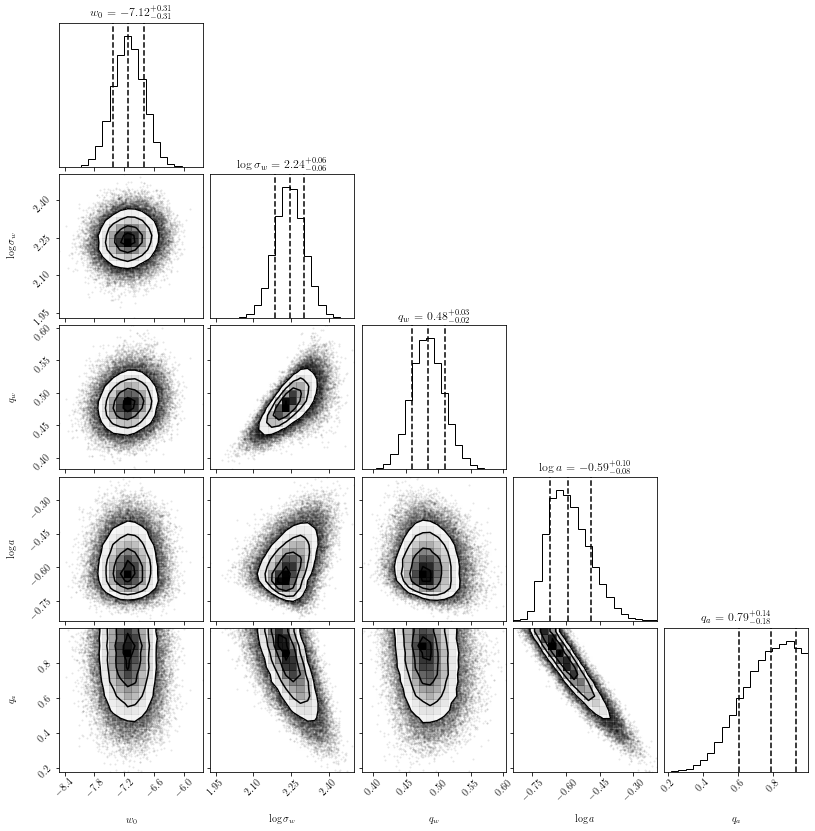

100%|██████████| 5000/5000 [00:00<00:00, 32714.38it/s]


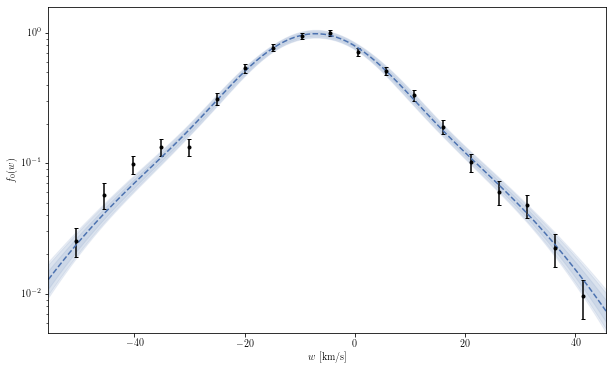

saved (0.29)_(0.31)
(0.31)_(0.33)


 20%|██        | 1/5 [00:00<00:03,  1.04it/s]

(60, 6)
(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.09it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.09it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 42.94it/s]


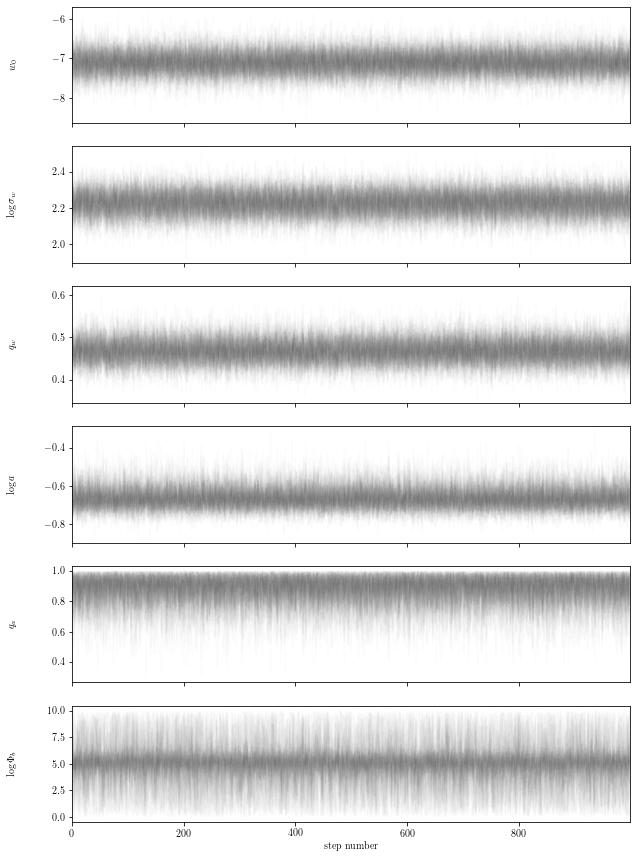

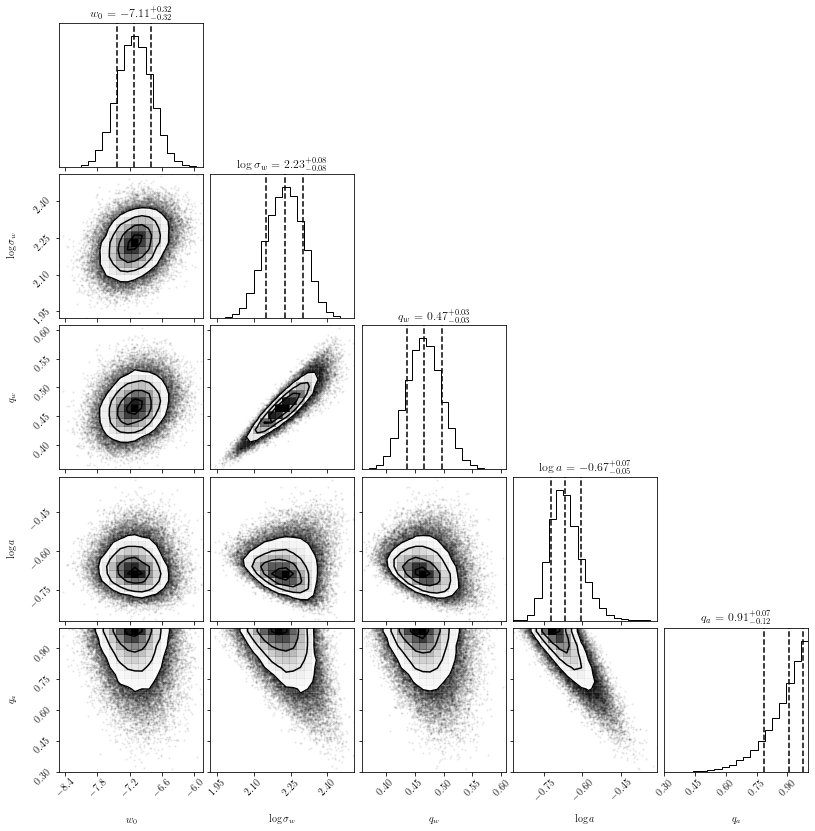

100%|██████████| 5000/5000 [00:00<00:00, 31236.30it/s]


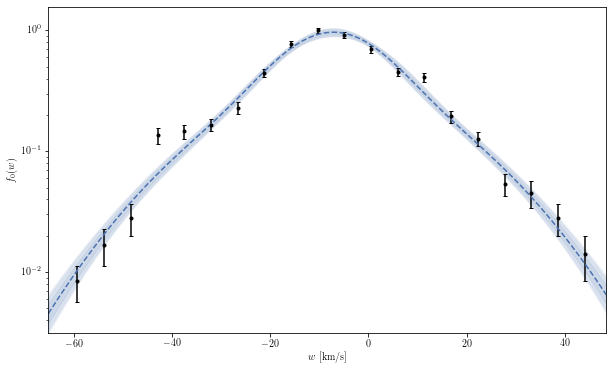

saved (0.31)_(0.33)
(0.33)_(0.35)


 20%|██        | 1/5 [00:00<00:03,  1.05it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.07it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.10it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.11it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 42.65it/s]


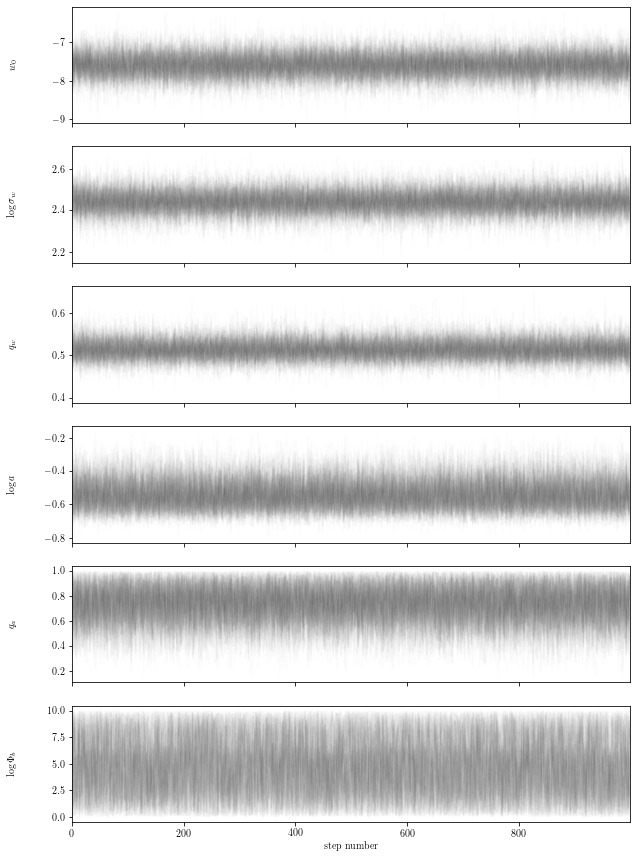

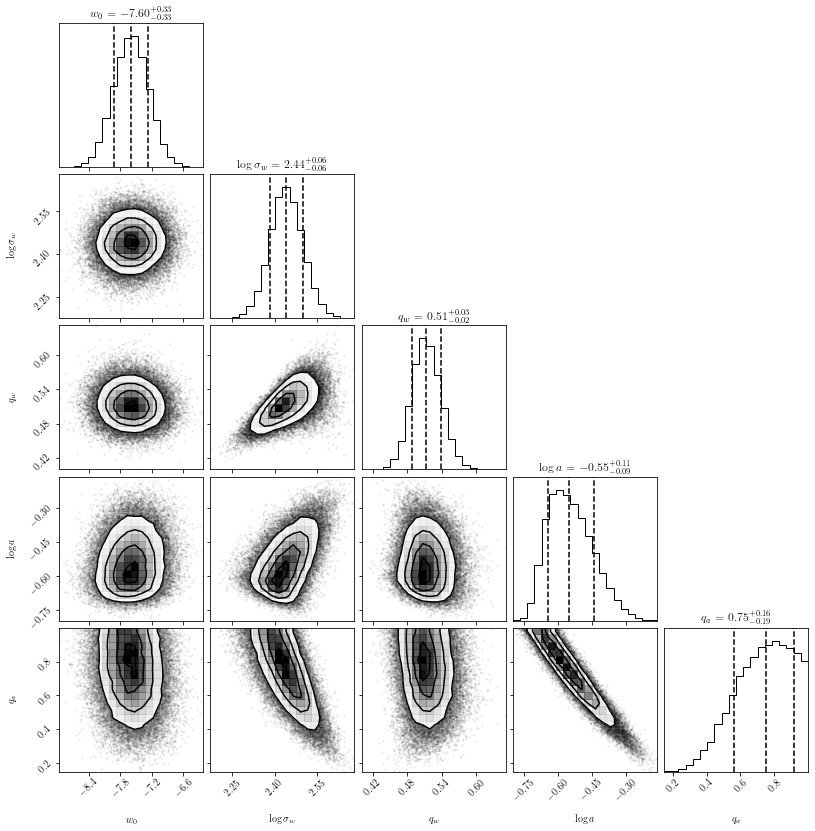

100%|██████████| 5000/5000 [00:00<00:00, 29065.35it/s]


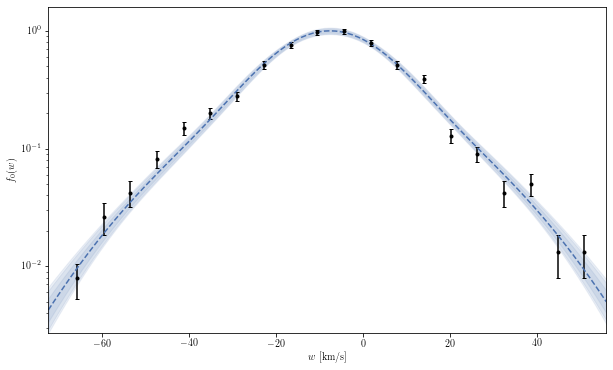

saved (0.33)_(0.35)
(0.35)_(0.37)


 20%|██        | 1/5 [00:00<00:03,  1.04it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.11it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.09it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.09it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 20.39it/s]


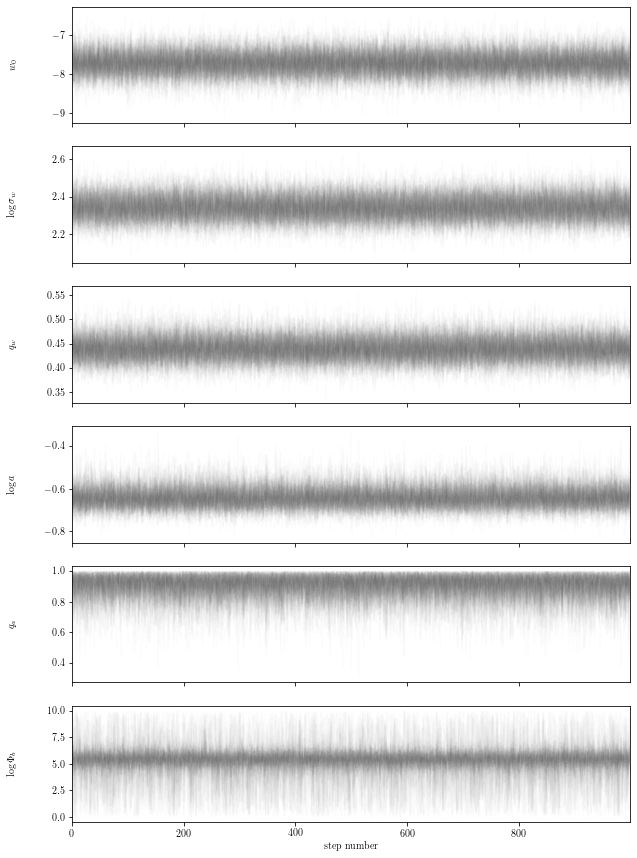

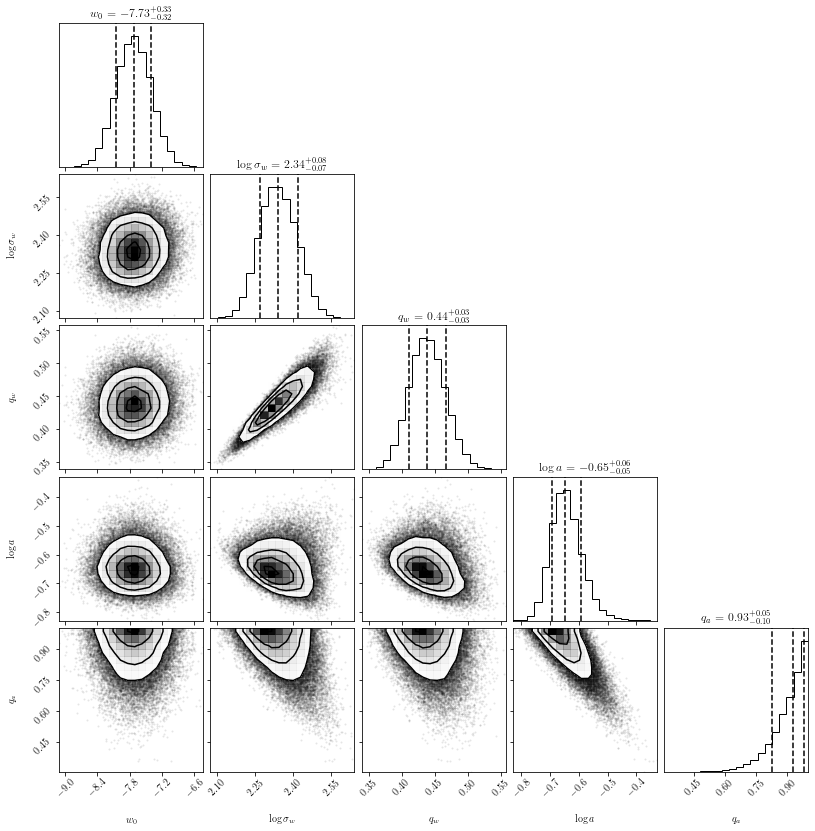

100%|██████████| 5000/5000 [00:00<00:00, 35208.62it/s]


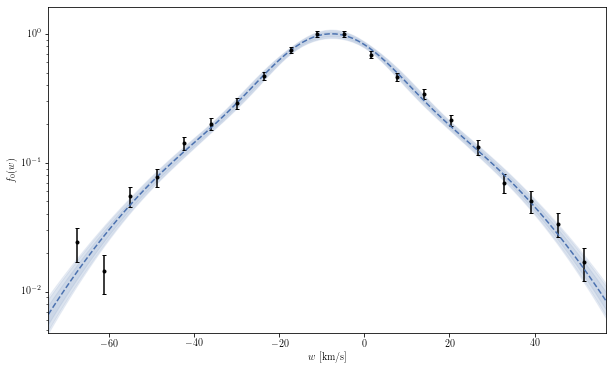

saved (0.35)_(0.37)
(0.37)_(0.38)


 20%|██        | 1/5 [00:01<00:04,  1.04s/it]

(60, 6)
(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.05it/s]

(60, 6)
(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 45.40it/s]


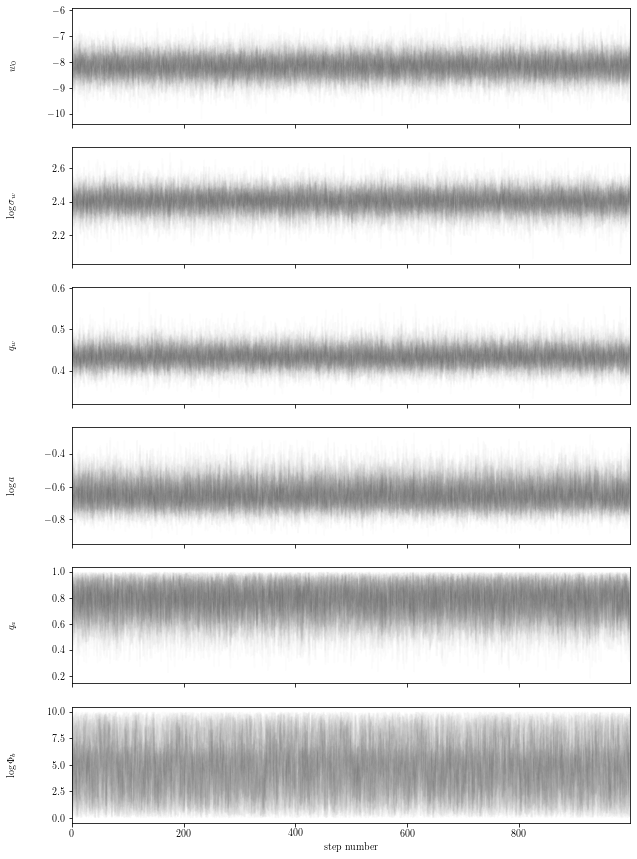

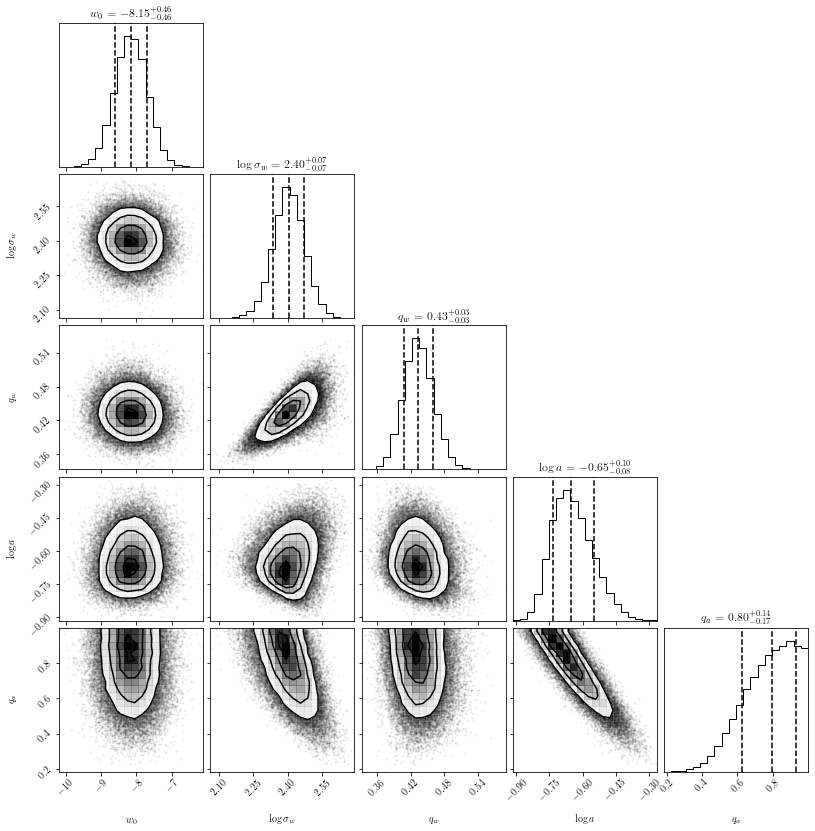

100%|██████████| 5000/5000 [00:00<00:00, 34470.97it/s]


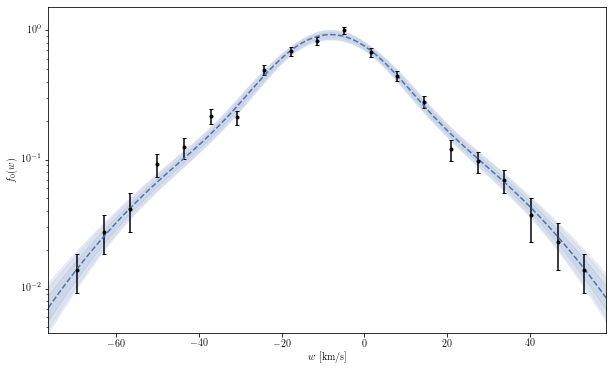

saved (0.37)_(0.38)
(0.38)_(0.40)


 20%|██        | 1/5 [00:00<00:03,  1.09it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.07it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.07it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.07it/s]

(60, 6)


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

(60, 6)



100%|██████████| 6/6 [00:00<00:00, 44.43it/s]


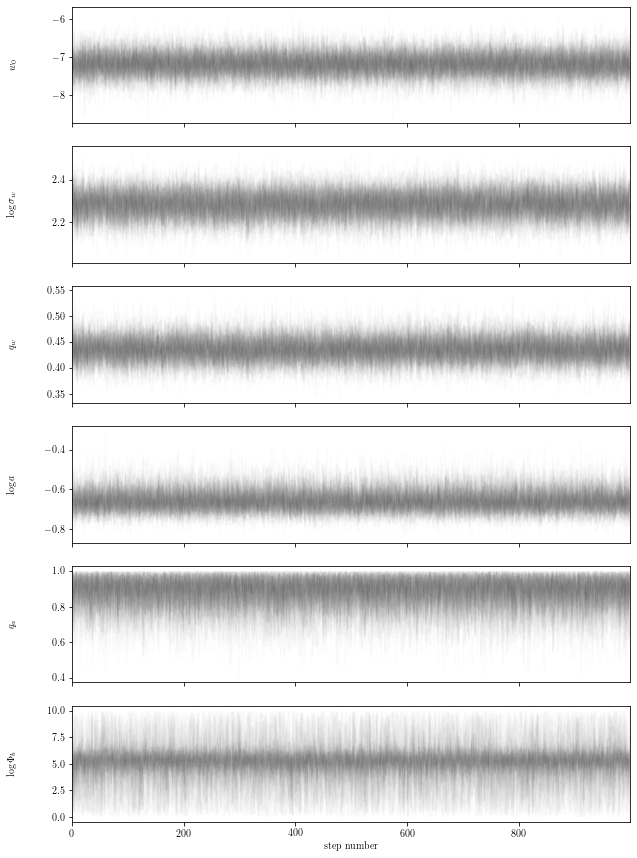

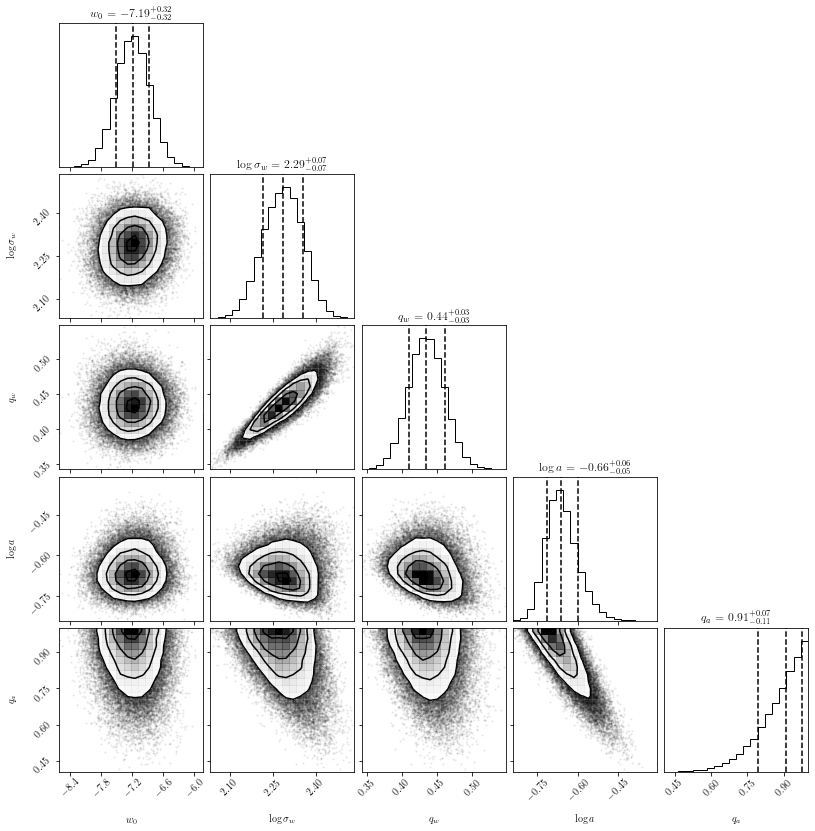

100%|██████████| 5000/5000 [00:00<00:00, 29647.63it/s]


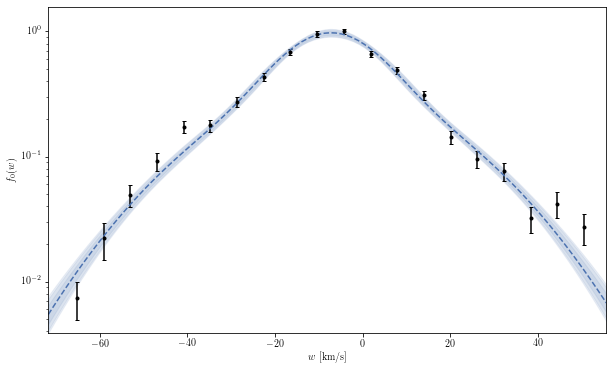

saved (0.38)_(0.40)


In [29]:
files = glob(join(w_dir_path, "w*"))
files.sort()
for file in files[1:]:
    name = file.split("/")[-1].replace(".hdf5", "").replace("w_", "")
    print(name)
    wdata = get_data(file)
    res = generate_init(Model.KIN)
    locs = res['locs']
    scales = res['scales']
    labs = res['labs']
    labels = res['labels']
    indexes = res['indexes']
    ndim = len(labs)
    nwalker = 10*ndim
    p0 = None
    p0 = vel.generate_p0(nwalker, locs, scales)
    p0.shape
    for _ in tqdm(range(5)):
        chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
        locs_normal, scales_normal = get_initial_position_normal(Model.KIN, chain=chain[1000:])
        p0 = vel.generate_p0(nwalker, locs_normal, scales_normal, norm=True)
        print(p0.shape)
        chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
        p0 = chain[-1]
    chain = vel.mcmc(100_000, p0, wdata, locs, scales, parallel=True, verbose=True)
    chain_thin = chain[::100]
    params = get_params(chain_thin, indexes, labs)
    plot_chain(params=params, labels=labels, alpha=0.01, path=join(data_dir, "plots", f"chain_{name}.pdf"))
    plot_corner(params=params[:,:, :-1], labels=labels[:-1], path=join(data_dir, "plots", f"corner_{name}.pdf"))
    flat_chain = chain_thin.reshape(-1, ndim)
    plot_fit_w(flat_chain=flat_chain, wdata=wdata, log=True, path=join(data_dir, "plots", f"fit_{name}.pdf"))
    np.save(join(data_dir, 'data', f"psi_{name}.npy"), flat_chain[:, :-1])
    print("saved", name)

# Load

In [26]:
files = glob(join(data_dir, 'data', "*.npy"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/psi_(0.38)_(0.40).npy']

In [158]:
names = [f.split("/")[-1].replace("chain-", "") for f in files]
names

['(-0.10)_(0.11).npy',
 '(0.11)_(0.16).npy',
 '(0.16)_(0.20).npy',
 '(0.20)_(0.24).npy',
 '(0.24)_(0.27).npy',
 '(0.27)_(0.29).npy',
 '(0.29)_(0.31).npy',
 '(0.31)_(0.33).npy',
 '(0.33)_(0.35).npy',
 '(0.35)_(0.37).npy',
 '(0.37)_(0.38).npy',
 '(0.38)_(0.40).npy']

In [159]:
import re

# capture string within parenthesis ()

c = [re.findall(r'\((.*?)\)', name) for name in names]
c0 = np.array([float(ci[0]) for ci in c])
c1 = np.array([float(ci[1]) for ci in c])
c = (c0+c1)/2
c

array([0.005, 0.135, 0.18 , 0.22 , 0.255, 0.28 , 0.3  , 0.32 , 0.34 ,
       0.36 , 0.375, 0.39 ])

In [166]:
for i, file in enumerate(tqdm(files)):
    flat_samples = np.load(file)
    print(flat_samples.shape)

100%|██████████| 12/12 [00:00<00:00, 595.39it/s]

(1000, 54, 6)
(1000, 60, 6)
(1000, 58, 6)
(1000, 60, 6)
(1000, 56, 6)
(1000, 60, 6)
(1000, 60, 6)
(1000, 60, 6)
(1000, 60, 6)
(1000, 58, 6)
(1000, 60, 6)
(1000, 60, 6)


In [192]:
from scipy.integrate import simps
from hammer import vel

Ew = np.empty((len(c), 1000*50))
Ew2 = np.empty((len(c), 1000*50))
ws = np.linspace(-100, 100, 1000)
ndim = 6
for i, file in enumerate(tqdm(files)):
    chain = np.load(file)
    flat_samples = chain.reshape((-1, ndim))
    flat_samples = flat_samples[:1000*50]
    fw = np.empty((1000*50, len(ws)))
    for j in range(1000*50):
        fw[j] = vel.fw(ws, flat_samples[j])
    mean = simps(fw*ws[None, :], ws[None, :], axis=1)/simps(fw, ws[None, :], axis=1)
    rms = simps(fw*ws[None, :]*ws[None, :],ws[None, :], axis=1)/simps(fw, ws[None, :], axis=1)
    Ew[i] = mean
    Ew2[i] = rms

100%|██████████| 12/12 [01:50<00:00,  9.23s/it]


In [193]:
variances = Ew2 - Ew*Ew
means = Ew
sigmas = np.sqrt(variances)

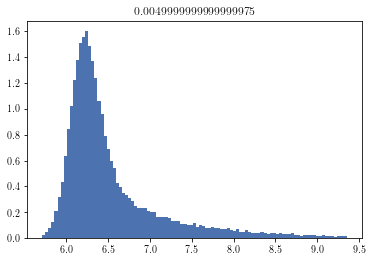

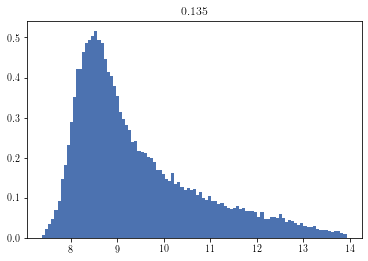

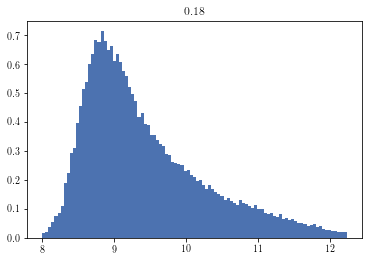

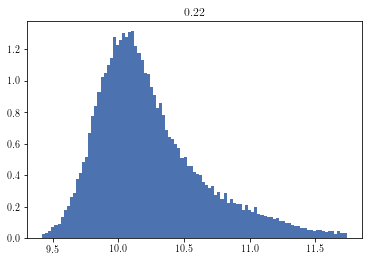

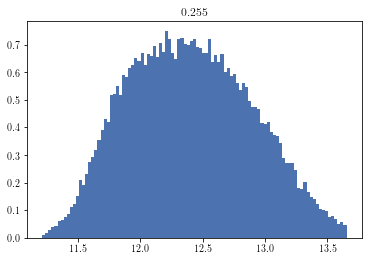

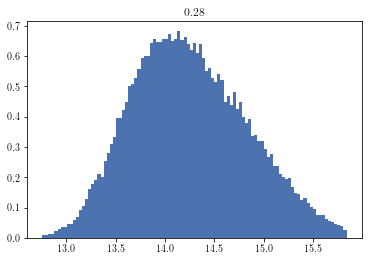

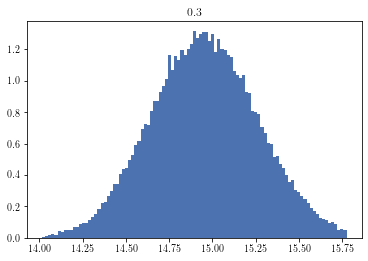

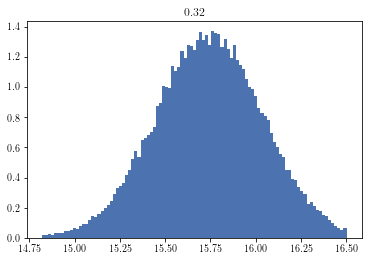

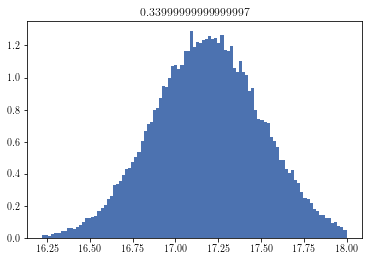

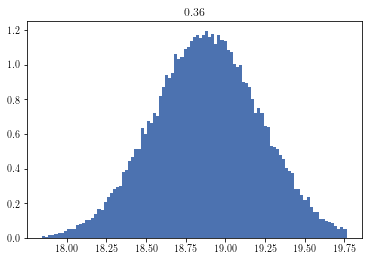

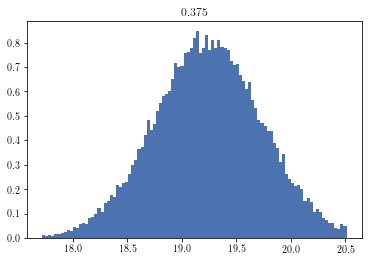

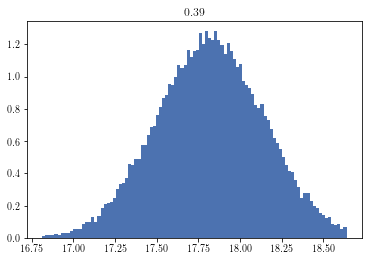

In [194]:
for ci, sig in zip(c, sigmas):
    edge = np.linspace(np.percentile(sig, 0.1), np.percentile(sig, 99.4), 100)
    plt.hist(sig, bins=edge, density=True)
    plt.title(ci)
    plt.show()

In [195]:
mean_w0 = np.mean(means, axis=1)
sigma_w0 = np.std(means, axis=1)

<ErrorbarContainer object of 3 artists>

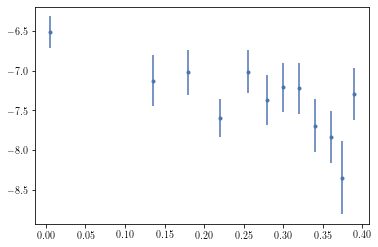

In [196]:
plt.errorbar(c, mean_w0, yerr=sigma_w0, fmt='.')

In [197]:
mean_sigmaw = np.mean(sigmas, axis=1)
sigma_sigmaw = np.std(sigmas, axis=1) 

<ErrorbarContainer object of 3 artists>

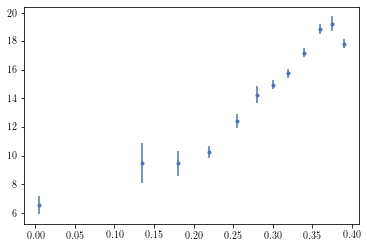

In [198]:
plt.errorbar(c, mean_sigmaw, yerr=sigma_sigmaw, fmt='.')

In [203]:
median_sigmaw = np.median(sigmas, axis=1)
mad_sigmaw = np.median(np.abs(sigmas-np.repeat(median_sigmaw, 50_000).reshape(-1, 50_000)), axis=1)

<ErrorbarContainer object of 3 artists>

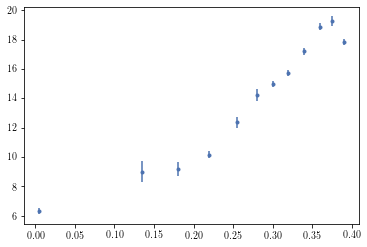

In [204]:
plt.errorbar(c, median_sigmaw, yerr=mad_sigmaw, fmt='.')